# 시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회
다양한 장비/서비스에서 일어나는 시스템 데이터를 통해 사용자의 불편을 예지하기 위해 ‘시스템 데이터’와 ‘사용자 불편 발생 데이터’를 분석하여 불편을 느낀 사용자와 불편 요인들을 찾아주세요.

# 1. 데이터 및 라이브러리 불러오기

## 1_1 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url1 = '/content/drive/MyDrive/project/data/system_quality_customer_complain_data/train_err_data_.csv'
url2 = '/content/drive/MyDrive/project/data/system_quality_customer_complain_data/train_problem_data_.csv'
url3 = '/content/drive/MyDrive/project/data/system_quality_customer_complain_data/train_quality_data_.csv'
url4 = '/content/drive/MyDrive/project/data/system_quality_customer_complain_data/test_err_data_.csv'
url5 = '/content/drive/MyDrive/project/data/system_quality_customer_complain_data/test_quality_data_.csv'
url6 = '/content/drive/MyDrive/project/data/system_quality_customer_complain_data/sample_submission.csv'
data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)
data3 = pd.read_csv(url3)
data4 = pd.read_csv(url4)
data5 = pd.read_csv(url5)
data6 = pd.read_csv(url6)
train_err_data = pd.DataFrame(data1)
train_problem_data = pd.DataFrame(data2)
train_quality_data = pd.DataFrame(data3)
test_err_data = pd.DataFrame(data4)
test_quality_data = pd.DataFrame(data5)
sample_submission = pd.DataFrame(data6)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [65]:
data7 = pd.read_csv('/content/drive/MyDrive/project/data/system_quality_customer_complain_data/train_problem_data.csv')
data8 = pd.read_csv('/content/drive/MyDrive/project/data/system_quality_customer_complain_data/train_quality_data.csv')
data9 = pd.read_csv('/content/drive/MyDrive/project/data/system_quality_customer_complain_data/train_err_data.csv')
problem_data = pd.DataFrame(data7)
quality_data = pd.DataFrame(data8)
err_data = pd.DataFrame(data9)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
train_err_data

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
0,0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0
...,...,...,...,...,...,...,...
16554658,16554658,24999,2020-11-30 16:30:51,model_3,05.15.2138,15,1
16554659,16554659,24999,2020-11-30 17:26:25,model_3,05.15.2138,16,1
16554660,16554660,24999,2020-11-30 17:26:25,model_3,05.15.2138,4,0
16554661,16554661,24999,2020-11-30 17:26:31,model_3,05.15.2138,4,0


In [5]:
train_problem_data

,Unnamed: 0,user_id,time
0,0,19224,2020-11-02 20:00:00
1,1,23664,2020-11-16 14:00:00
2,2,15166,2020-11-14 13:00:00
3,3,12590,2020-11-08 21:00:00
4,4,15932,2020-11-03 21:00:00
...,...,...,...
5424,5424,20167,2020-11-25 12:00:00
5425,5425,16270,2020-11-10 12:00:00
5426,5426,19114,2020-11-06 23:00:00
5427,5427,21505,2020-11-04 11:00:00


In [6]:
train_quality_data

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,1,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,2,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,3,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,4,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,828619,2020-11-24 03:30:00,24997,04.22.1778,0.0,0,0.0,0,0,1,0,0,0,0,17,0,0
828620,828620,2020-11-24 03:30:00,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828621,828621,2020-11-24 03:30:00,24997,04.22.1778,0.0,0,0.0,0,0,3,0,0,0,0,17,0,0
828622,828622,2020-11-24 03:30:00,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0


In [7]:
test_err_data

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
0,0,30000,2020-11-01 03:02:27,model_1,04.16.3553,31,1
1,1,30000,2020-11-01 03:02:27,model_1,04.16.3553,33,2
2,2,30000,2020-11-01 03:02:28,model_1,04.16.3553,15,1
3,3,30000,2020-11-01 03:02:56,model_1,04.16.3553,22,1
4,4,30000,2020-11-01 03:03:00,model_1,04.16.3553,11,1
...,...,...,...,...,...,...,...
16532643,16532643,44998,2020-11-30 21:00:50,model_1,04.16.3553,40,0
16532644,16532644,44998,2020-11-30 21:18:31,model_1,04.16.3553,31,1
16532645,16532645,44998,2020-11-30 21:18:32,model_1,04.16.3553,15,1
16532646,16532646,44998,2020-11-30 21:22:59,model_1,04.16.3553,16,1


In [8]:
test_quality_data

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0,2020-11-28 19:50:00,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
1,1,2020-11-28 19:50:00,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
2,2,2020-11-28 19:50:00,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
3,3,2020-11-28 19:50:00,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
4,4,2020-11-28 19:50:00,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747967,747967,2020-11-25 18:00:00,44997,04.22.1750,0.0,0,0.0,0,0,2,0,0,0,0,3,0,0
747968,747968,2020-11-25 18:00:00,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
747969,747969,2020-11-25 18:00:00,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
747970,747970,2020-11-25 18:00:00,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0


In [9]:
sample_submission

,user_id,problem
0,30000,0
1,30001,0
2,30002,0
3,30003,0
4,30004,0
...,...,...
14994,44994,0
14995,44995,0
14996,44996,0
14997,44997,0


## 1_2 Column별 설명

### 1_2_1 err_data

* `Err Data`는 사람들이 에러를 접한 시간을 기준으로  
  <u><b>어떤 Model</b> & <b>Fwver을 사용</b>하고, <b>접한 Errtype</b> & <b>Errcode는 무엇인지</b></u>에 대하여 알려주는 데이터이다.
  * 변수는 총 6개이고, 관측치는 약 1600만개로 User ID별로 시계열 데이터가 나와있는 자료이다.  

|Column|Description|dtype|
|---|---|---|
|user_id|사용자 고유 ID|int64|
|time|에러 발생 시간|int64|
|model_nm|에러가 발생한 모델명|object|
|fwver|에러가 발생한 펌웨어 버전|object|
|errtype|에러 분류 (에러 타입)|int64|
|errcode|어떤 에러가 발생하였는지 (에러 코드)|object|

In [10]:
train_err_data.head()

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
0,0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0


### 1_2_2 quality data

* `Quality Data`는 사용자의 시스템 작동 중 문제가 발생하면  
  측정 가능한 지표들로 <b><u>해당 시점으로부터 2시간 단위로 수집한 정보</u></b>를 알려주는 데이터이다.

|Column|Description|dtype|
|---|---|---|
|time|퀄리티 데이터가 수집된 시간|int64|
|user_id|사용자 고유 ID|int64|
|fwver|퀄리티 데이터가 수집되었을때 펌웨어 버전|object|
|quality|에에러 퀄리티 수치 (0~12, 총 13개 컬럼)|int64&object|


In [11]:
train_quality_data.head()

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,1,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,2,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,3,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,4,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [12]:
train_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  828624 non-null  int64  
 1   time        828624 non-null  object 
 2   user_id     828624 non-null  int64  
 3   fwver       788544 non-null  object 
 4   quality_0   684192 non-null  float64
 5   quality_1   828624 non-null  int64  
 6   quality_2   788511 non-null  float64
 7   quality_3   828624 non-null  int64  
 8   quality_4   828624 non-null  int64  
 9   quality_5   828604 non-null  object 
 10  quality_6   828624 non-null  int64  
 11  quality_7   828624 non-null  object 
 12  quality_8   828624 non-null  object 
 13  quality_9   828624 non-null  object 
 14  quality_10  828624 non-null  object 
 15  quality_11  828624 non-null  int64  
 16  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 107.5+ MB


### 1_2_3 problem data

* `Problem Data`는 전체 사용자 중에서, <b>불만을 제기한 사람들의 시간</b>을 알려주는 데이터이다.
    * User ID : 불만을 제기한 유저
    * Time : 불만을 제기한 시간
    * <u>한 사용자가 여러번 불만을 제기할 수 있음</u>

|Column|Description|dtype|
|---|---|---|
|user_id|사용자 고유 ID|int64|
|time|불만을 제기한 시간|int64|

In [13]:
train_problem_data.head()

,Unnamed: 0,user_id,time
0,0,19224,2020-11-02 20:00:00
1,1,23664,2020-11-16 14:00:00
2,2,15166,2020-11-14 13:00:00
3,3,12590,2020-11-08 21:00:00
4,4,15932,2020-11-03 21:00:00


In [14]:
train_problem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5429 non-null   int64 
 1   user_id     5429 non-null   int64 
 2   time        5429 non-null   object
dtypes: int64(2), object(1)
memory usage: 127.4+ KB


# 2. EDA

## 2_1 Quality Dataset

In [15]:
train_quality_data.head()

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,1,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,2,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,3,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,4,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [16]:
train_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  828624 non-null  int64  
 1   time        828624 non-null  object 
 2   user_id     828624 non-null  int64  
 3   fwver       788544 non-null  object 
 4   quality_0   684192 non-null  float64
 5   quality_1   828624 non-null  int64  
 6   quality_2   788511 non-null  float64
 7   quality_3   828624 non-null  int64  
 8   quality_4   828624 non-null  int64  
 9   quality_5   828604 non-null  object 
 10  quality_6   828624 non-null  int64  
 11  quality_7   828624 non-null  object 
 12  quality_8   828624 non-null  object 
 13  quality_9   828624 non-null  object 
 14  quality_10  828624 non-null  object 
 15  quality_11  828624 non-null  int64  
 16  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 107.5+ MB


In [17]:
for i in range(0,12):
  print(f'-------quality{i}--------')
  print(train_quality_data[f'quality_{i}'].value_counts())
  print()

-------quality0--------
 0.0       542790
-1.0       130828
 1.0         2097
 2.0         1252
 3.0          518
            ...  
 1113.0         1
 1177.0         1
 1186.0         1
 946.0          1
 2351.0         1
Name: quality_0, Length: 753, dtype: int64

-------quality1--------
 0      670270
-1      153649
 1        2567
 2        1140
 3         391
 4         202
 5         134
 6          71
 7          50
 8          35
 9          26
 10         24
 11         12
 12          7
 13          6
 14          5
 21          4
 20          4
 170         4
 18          4
 17          3
 15          3
 16          3
 169         2
 23          2
 35          1
 117         1
 171         1
 19          1
 88          1
 40          1
Name: quality_1, dtype: int64

-------quality2--------
 0.0        632469
-1.0        144392
 1.0          2937
 2.0          1073
 3.0           580
             ...  
 872.0           1
 11259.0         1
 373.0           1
 8278.0          1


### 2_1_1 fwver column

Dtype이 object인 이유?

In [18]:
train_quality_data['fwver'].unique() # 전부 string으로 들어가있다.

array(['05.15.2138', '04.22.1750', '04.16.3553', '04.33.1261',
       '04.22.1778', '04.33.1185', '04.16.3571', '05.66.3571',
       '03.11.1149', '03.11.1167', '04.82.1684', '04.82.1778',
       '04.33.1149', nan, '05.66.3237', '04.73.2237', '09.17.1431',
       '04.22.1684', '05.15.2120', '04.33.1125', '05.15.2122',
       '04.22.1666', '04.22.1656', '04.16.3439', '04.73.2571',
       '05.15.2114', '04.16.3345', '04.22.1442'], dtype=object)

In [19]:
type(train_quality_data.iloc[-1,2])

numpy.int64

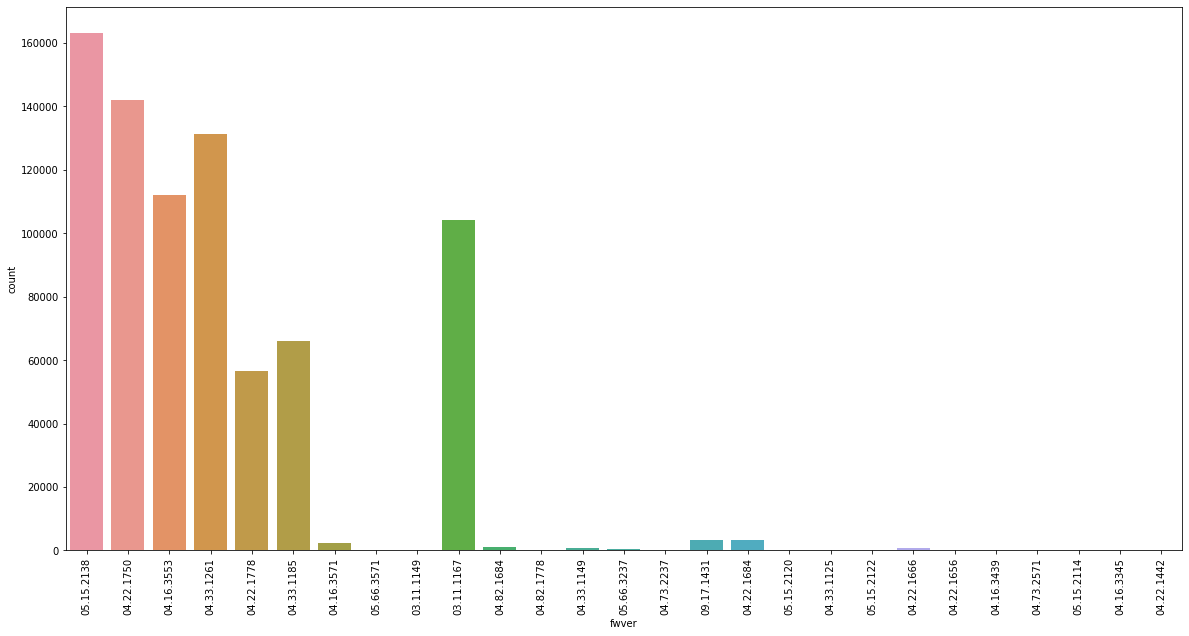

In [20]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.countplot(data = train_quality_data, x = 'fwver')
plt.xticks(rotation=90)
plt.show()

In [21]:
# user와 fwver 관계

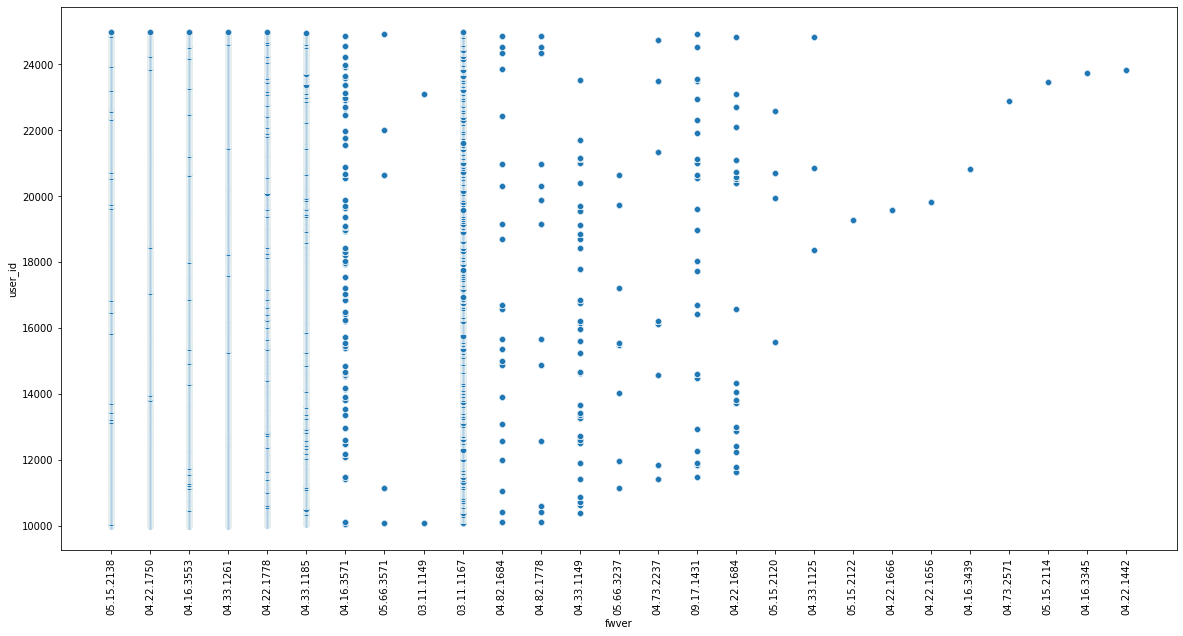

In [22]:

fig,ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data = train_quality_data, x = 'fwver', y = 'user_id')
plt.xticks(rotation=90)
plt.show()

### 2_1_2 Quality 데이터 시간별 시각화

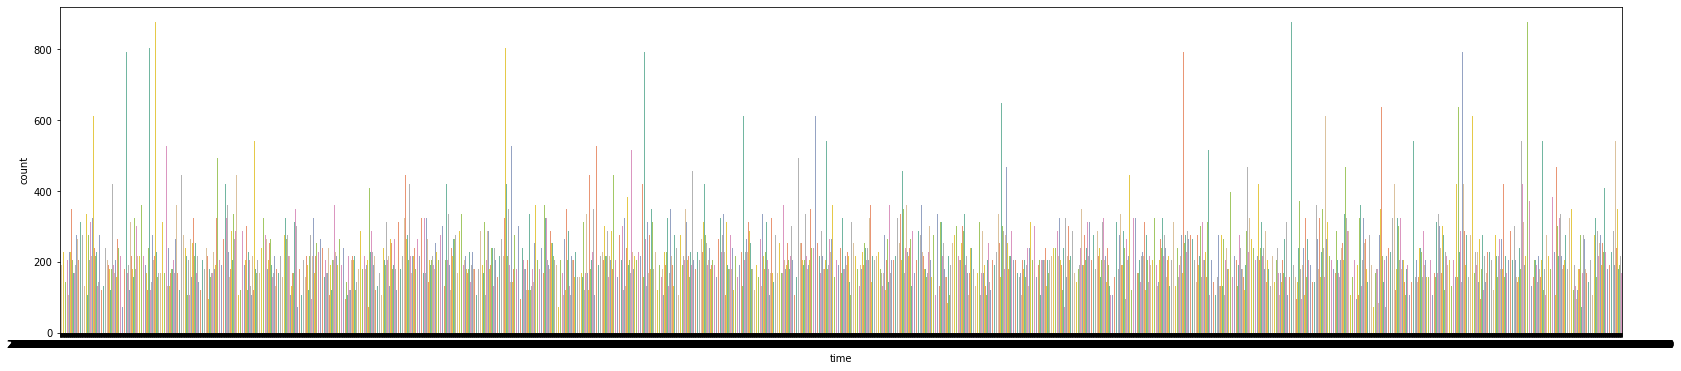

In [23]:
# 시간별 quality 시각화 (전체)
plt.figure(figsize=(28,6))
ax = sns.countplot(data=train_quality_data, x='time', palette="Set2", order=train_problem_data["time"])

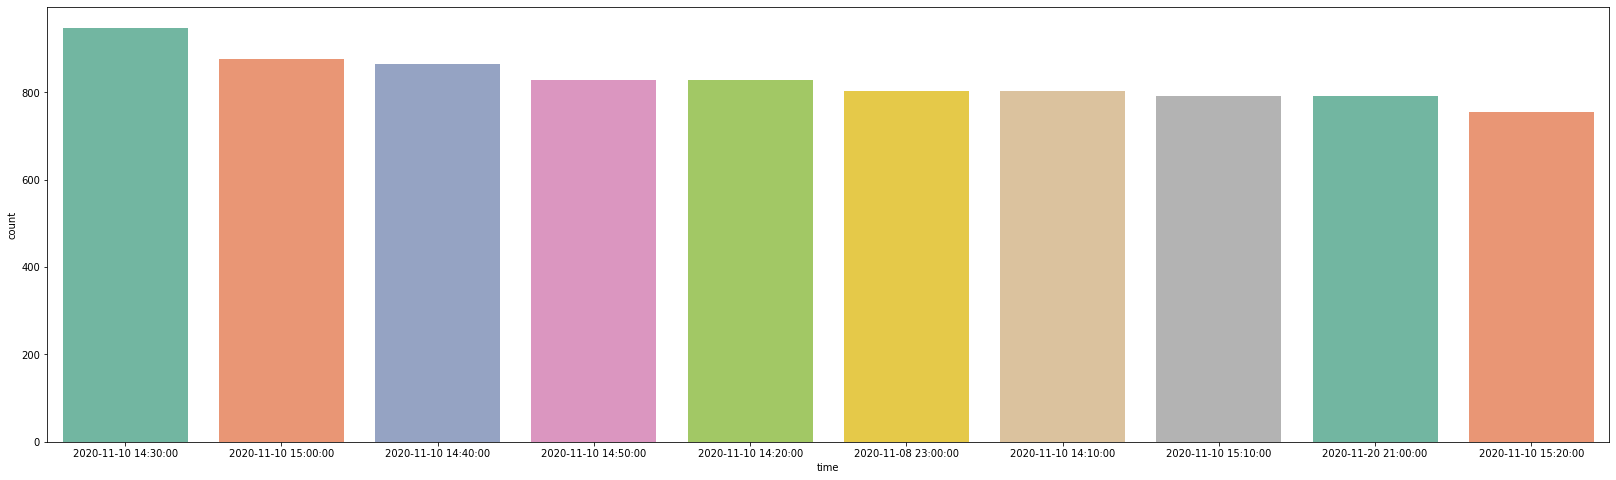

In [24]:
# 시간별 quality 시각화 (상위 10개)
plt.figure(figsize=(28,8))
ax = sns.countplot(data=train_quality_data, x='time', palette="Set2", order=train_quality_data["time"].value_counts().index[:10])

quality 로그의 경우 11월10일에 가장 많이 발생했습니다.

### 2_1_3 quality 컬럼별 분포

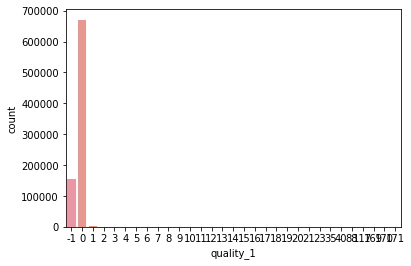

In [37]:
sns.countplot(x='quality_1',data=train_quality_data)

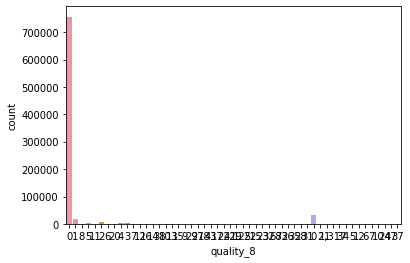

In [38]:
sns.countplot(x='quality_8',data=train_quality_data)

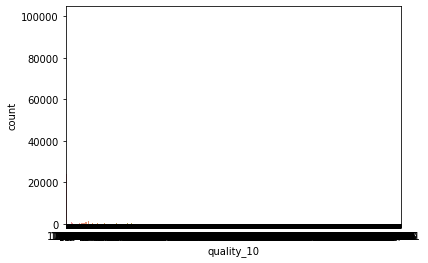

In [39]:
sns.countplot(x='quality_10',data=train_quality_data)

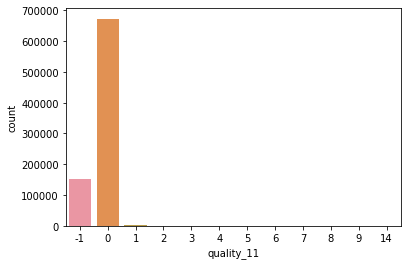

In [40]:
sns.countplot(x='quality_11',data=train_quality_data)

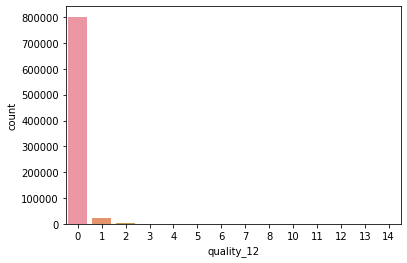

In [41]:
sns.countplot(x='quality_12',data=train_quality_data)

## 2_2 Err_dataset

### 2_2_1 에러타입별 불만 제기 분석

In [25]:
p_user = train_problem_data.user_id.unique() # problem 데이터셋의 유저아이디: 불만을 제기한 유저 아이디
np_user = list(set(train_err_data.user_id.unique()) -set(p_user)) # error가 발생했는데 불만을 제기 안한 유저 아이디

In [26]:
def get_distribution_errtype():
    total = []
    for num in range(1,43):
        if num == 29:
            continue
        t1 = train_err_data.loc[train_err_data.errtype==num] # errtype 별 데이터 프레임
        t11 = t1.user_id.value_counts().describe().to_frame().T.rename(index ={'user_id':num}) # errtype 별로 발생 빈도 describe

        pnumber = len(t1.loc[t1.user_id.isin(p_user)].user_id.unique()) # errtype 별 불만을 제기한 사람 수
        npnumber = len(t1.loc[t1.user_id.isin(np_user)].user_id.unique()) # errtype 별 불만을 제기안한 사람 수
        
        t11['p_counts'] = pnumber # errtype 별 불만을 제기한 사람 수
        t11['npnumber'] = npnumber # errtype 별 불만을 제기안한 사람 수
        t11['p_ratio'] = round((pnumber/(pnumber+npnumber))*100,2) # 불만 제기 비율
        total.append(t11)
        
    return pd.concat(total).reset_index().rename(columns={'index':'errtype'})

errtype_distribution = get_distribution_errtype()

errtype_distribution

,errtype,count,mean,std,min,25%,50%,75%,max,p_counts,npnumber,p_ratio
0,1,950.0,22.678947,18.943070,1.0,2.0,30.0,30.0,171.0,242,708,25.47
1,2,390.0,66.938462,352.626788,1.0,2.0,2.0,6.0,4056.0,168,222,43.08
2,3,1679.0,18.319238,210.186901,1.0,1.0,2.0,5.0,7284.0,465,1214,27.70
3,4,6881.0,188.453713,2778.822793,1.0,1.0,17.0,152.0,195228.0,2298,4583,33.40
4,5,11010.0,86.550409,261.247025,1.0,3.0,9.0,49.0,6637.0,4028,6982,36.58
5,6,6467.0,7.806092,47.292207,1.0,1.0,2.0,4.0,1796.0,2662,3805,41.16
6,7,7648.0,6.798248,46.755629,1.0,1.0,2.0,4.0,2687.0,3093,4555,40.44
7,8,64.0,2.593750,2.549315,1.0,1.0,2.0,3.0,19.0,13,51,20.31
8,9,63.0,1.730159,2.444258,1.0,1.0,1.0,1.0,17.0,38,25,60.32
9,10,2360.0,56.526695,1064.242805,1.0,1.0,2.0,6.0,49106.0,1134,1226,48.05


### 2_2_2 에러타입 시간별 분석

In [76]:
train_err_data['time'] = pd.to_datetime(train_err_data['time'])
display(train_err_data)
train_err_data.info()

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
0,0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0
...,...,...,...,...,...,...,...
16554658,16554658,24999,2020-11-30 16:30:51,model_3,05.15.2138,15,1
16554659,16554659,24999,2020-11-30 17:26:25,model_3,05.15.2138,16,1
16554660,16554660,24999,2020-11-30 17:26:25,model_3,05.15.2138,4,0
16554661,16554661,24999,2020-11-30 17:26:31,model_3,05.15.2138,4,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Unnamed: 0  int64         
 1   user_id     int64         
 2   time        datetime64[ns]
 3   model_nm    object        
 4   fwver       object        
 5   errtype     int64         
 6   errcode     object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 884.1+ MB


In [77]:

def make(num):
    err =  train_err_data.loc[train_err_data.errtype==num]
    users = err.user_id.unique()
    # users2 = err.user_id.value_counts().to_frame().index # 굳이 이렇게 하나 싶어서 바꿈
    t2 = err.loc[err.user_id.isin(users)]
    err2 = err.copy()
    err2['err_'+str(num)] = err2.time.dt.hour # 에러가 발생한 시간

    # datatime 객체로 되있는거에서 year hour등등 만 뽑을라면 .dt.뽑으려는것
    # 으로 해야되더라고요 판다스 series 에서 시간 처리하는 메소드 였네요 근데 이건 저장했다가 불려오면그냥 str로 읽어 오는게되서
    # 다시한번 date time으로 바꿔 주는 과정이 필요한것 같아요 실험 해보야 되여
    
    p = err2.loc[err2.user_id.isin(p_user)] # 만들어놓은 problem의 유저랑
    np = err2.loc[err2.user_id.isin(np_user)] # problem 접수안한 유저로  또 구분해준다 각각 에러타입 별
    
    display(p)
    pdf = p['err_'+str(num)].value_counts().sort_index().to_frame().T.rename(index = {'err_'+str(num):\ # 시간별 에러를 접수한 건수
                                                                                      'err_p'+str(num)}) 
    npdf = np['err_'+str(num)].value_counts().sort_index().to_frame().T.rename(index = {'err_'+str(num):\ # 시간별 에러가 발생했지만 접수를 하지 않은 경우
                                                                                      'err_np'+str(num)})
    # 위에서 에러 발생 hour 을 컬럼으로 만들어줘서
    # 밑에 보이는 것처럼 transpose해서 err_type 이 어느 시간에 얼마나 발생했는지 볼수있게만들었고 
    # 그걸 또 불만접수 여부로 나누었다
    
    # f는 불만접수 여부 나눈 dataframe을 합친것이다
    f = pd.concat([pdf,npdf])
    display(f)
    f2 = f.copy()
    f = f.fillna(0)
    
    f = round(f)
    # 뭔가 소수점이 있었나본데 값이
    # 굳이 copy해서 두개를 뽑은 이유는 모름
    display(f.info())
    return f, f2
# make라는 함수를 만들어서 매개변수로 errtype 숫자들을 받아 errtype 별로 데이터 프레임 만들고
make(1)

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_1
174529,174529,10168,2020-11-01 02:17:02,model_4,03.11.1167,1,0,2
174553,174553,10168,2020-11-02 05:18:05,model_4,03.11.1167,1,0,5
174621,174621,10168,2020-11-04 04:26:36,model_4,03.11.1167,1,0,4
174626,174626,10168,2020-11-05 03:49:02,model_4,03.11.1167,1,0,3
174645,174645,10168,2020-11-06 02:43:56,model_4,03.11.1167,1,0,2
...,...,...,...,...,...,...,...,...
16551737,16551737,24990,2020-11-28 19:56:22,model_4,03.11.1167,1,0,19
16551744,16551744,24990,2020-11-29 03:02:20,model_4,03.11.1167,1,0,3
16551747,16551747,24990,2020-11-29 18:19:52,model_4,03.11.1167,1,0,18
16551769,16551769,24990,2020-11-30 07:10:49,model_4,03.11.1167,1,0,7


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p1,13,8,903,910,879,542,18,40,79,35,...,28,43,48,43,49,63,51,67,43,26
err_np1,78,40,3971,3904,4168,2058,123,146,154,151,...,243,245,237,215,261,259,199,156,150,106


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p1 to err_np1
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 non

None

(         0   1     2     3     4     5    6    7    8    9   ...   14   15  \
 err_p1   13   8   903   910   879   542   18   40   79   35  ...   28   43   
 err_np1  78  40  3971  3904  4168  2058  123  146  154  151  ...  243  245   
 
           16   17   18   19   20   21   22   23  
 err_p1    48   43   49   63   51   67   43   26  
 err_np1  237  215  261  259  199  156  150  106  
 
 [2 rows x 24 columns],
          0   1     2     3     4     5    6    7    8    9   ...   14   15  \
 err_p1   13   8   903   910   879   542   18   40   79   35  ...   28   43   
 err_np1  78  40  3971  3904  4168  2058  123  146  154  151  ...  243  245   
 
           16   17   18   19   20   21   22   23  
 err_p1    48   43   49   63   51   67   43   26  
 err_np1  237  215  261  259  199  156  150  106  
 
 [2 rows x 24 columns])

In [78]:
t = []

for v in range(1,43): # 왜 v라고 했는지 모르겠지만 errtype의 숫자들을 하나씩 뽑는 for 문
    if v == 29:
        pass
    else:
        
        df ,_ = make(v)
        t.append(df)

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_1
174529,174529,10168,2020-11-01 02:17:02,model_4,03.11.1167,1,0,2
174553,174553,10168,2020-11-02 05:18:05,model_4,03.11.1167,1,0,5
174621,174621,10168,2020-11-04 04:26:36,model_4,03.11.1167,1,0,4
174626,174626,10168,2020-11-05 03:49:02,model_4,03.11.1167,1,0,3
174645,174645,10168,2020-11-06 02:43:56,model_4,03.11.1167,1,0,2
...,...,...,...,...,...,...,...,...
16551737,16551737,24990,2020-11-28 19:56:22,model_4,03.11.1167,1,0,19
16551744,16551744,24990,2020-11-29 03:02:20,model_4,03.11.1167,1,0,3
16551747,16551747,24990,2020-11-29 18:19:52,model_4,03.11.1167,1,0,18
16551769,16551769,24990,2020-11-30 07:10:49,model_4,03.11.1167,1,0,7


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p1,13,8,903,910,879,542,18,40,79,35,...,28,43,48,43,49,63,51,67,43,26
err_np1,78,40,3971,3904,4168,2058,123,146,154,151,...,243,245,237,215,261,259,199,156,150,106


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p1 to err_np1
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 non

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_2
141038,141038,10134,2020-11-23 19:59:30,model_3,05.15.2138,2,1,19
141039,141039,10134,2020-11-23 19:59:38,model_3,05.15.2138,2,0,19
301055,301055,10306,2020-11-21 01:27:29,model_0,04.22.1750,2,1,1
301056,301056,10306,2020-11-21 01:27:30,model_0,04.22.1750,2,0,1
301057,301057,10306,2020-11-21 01:27:57,model_0,04.22.1750,2,1,1
...,...,...,...,...,...,...,...,...
16116124,16116124,24779,2020-11-02 19:55:11,model_2,04.33.1185,2,0,19
16504337,16504337,24951,2020-11-26 22:51:25,model_0,04.22.1778,2,1,22
16504338,16504338,24951,2020-11-26 22:51:26,model_0,04.22.1778,2,0,22
16524560,16524560,24966,2020-11-27 19:59:25,model_1,04.16.3553,2,1,19


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p2,444,747,500,274,209,123,51,214,264,323,...,144,247,147,463,342,803,428,525,961,1111
err_np2,1196,828,426,503,425,376,334,368,633,275,...,442,578,908,514,1790,1045,982,805,836,939


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p2 to err_np2
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 non

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_3
24558,24558,10019,2020-11-24 15:00:12,model_3,05.15.2138,3,2,15
94642,94642,10088,2020-11-14 04:33:18,model_3,05.15.2138,3,2,4
119168,119168,10115,2020-11-05 13:15:18,model_3,05.15.2138,3,1,13
140701,140701,10134,2020-11-10 18:22:06,model_3,05.15.2138,3,2,18
140718,140718,10134,2020-11-11 15:43:12,model_3,05.15.2138,3,2,15
...,...,...,...,...,...,...,...,...
16521676,16521676,24965,2020-11-18 04:41:45,model_4,03.11.1167,3,1,4
16551062,16551062,24990,2020-11-01 09:54:47,model_4,03.11.1167,3,1,9
16551416,16551416,24990,2020-11-15 20:19:23,model_4,03.11.1167,3,1,20
16551474,16551474,24990,2020-11-19 07:06:18,model_4,03.11.1167,3,1,7


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p3,353,512,391,488,698,793,698,604,446,551,...,585,606,680,652,486,703,612,658,618,362
err_np3,672,549,642,716,663,955,790,956,604,569,...,667,654,627,648,814,812,816,892,883,699


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p3 to err_np3
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 non

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_4
3532,3532,10004,2020-11-10 03:24:11,model_0,04.22.1750,4,1,3
4245,4245,10005,2020-11-10 14:29:54,model_0,04.22.1750,4,1,14
5041,5041,10006,2020-11-14 00:34:00,model_1,04.16.3553,4,1,0
15202,15202,10011,2020-11-20 04:25:49,model_0,04.22.1750,4,1,4
23826,23826,10019,2020-11-01 06:49:19,model_3,05.15.2138,4,0,6
...,...,...,...,...,...,...,...,...
16551767,16551767,24990,2020-11-29 21:27:16,model_4,03.11.1167,4,0,21
16551770,16551770,24990,2020-11-30 07:10:49,model_4,03.11.1167,4,0,7
16551776,16551776,24990,2020-11-30 21:10:32,model_4,03.11.1167,4,0,21
16551780,16551780,24990,2020-11-30 21:21:42,model_4,03.11.1167,4,0,21


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p4,12731,13017,13929,13417,13981,15443,16360,19976,18268,16879,...,11951,14552,14932,16218,18688,20080,14426,14274,13176,12556
err_np4,34258,30718,35460,36074,37699,38629,39155,44527,43572,41348,...,37505,37371,39715,41534,42890,42765,41759,42459,39480,34405


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p4 to err_np4
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 non

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_5
330,330,10001,2020-11-02 00:23:05,model_2,04.33.1185,5,B-A8002,0
331,331,10001,2020-11-02 00:23:10,model_2,04.33.1185,5,B-A8002,0
332,332,10001,2020-11-02 00:23:10,model_2,04.33.1185,5,B-A8002,0
333,333,10001,2020-11-02 00:23:11,model_2,04.33.1185,5,B-A8002,0
334,334,10001,2020-11-02 00:23:11,model_2,04.33.1185,5,B-A8002,0
...,...,...,...,...,...,...,...,...
16553878,16553878,24997,2020-11-28 12:09:00,model_0,04.22.1778,5,B-A8002,12
16553879,16553879,24997,2020-11-28 12:09:04,model_0,04.22.1778,5,B-A8002,12
16553880,16553880,24997,2020-11-28 12:09:06,model_0,04.22.1778,5,B-A8002,12
16553881,16553881,24997,2020-11-28 12:09:10,model_0,04.22.1778,5,B-A8002,12


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p5,17822,12411,9211,7118,6092,5426,5859,8616,13805,17497,...,22100,19934,21520,21212,23441,26886,25624,28312,23720,20603
err_np5,23053,14571,11242,8582,7377,6727,6303,12462,16599,21631,...,27758,27101,25574,25392,27517,34297,35964,36046,31772,28769


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p5 to err_np5
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 non

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_6
466,466,10001,2020-11-05 04:06:21,model_2,04.33.1185,6,14,4
3297,3297,10004,2020-11-01 02:47:46,model_0,04.22.1750,6,14,2
3580,3580,10004,2020-11-11 05:54:35,model_0,04.22.1750,6,14,5
3713,3713,10004,2020-11-18 06:36:26,model_0,04.22.1750,6,14,6
4926,4926,10006,2020-11-09 21:16:45,model_1,04.16.3553,6,14,21
...,...,...,...,...,...,...,...,...
16551651,16551651,24990,2020-11-24 19:17:28,model_4,03.11.1167,6,1,19
16551657,16551657,24990,2020-11-25 07:00:18,model_4,03.11.1167,6,1,7
16551703,16551703,24990,2020-11-26 21:50:12,model_4,03.11.1167,6,1,21
16551742,16551742,24990,2020-11-28 19:56:56,model_4,03.11.1167,6,1,19


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p6,1019,959,1024,1100,935,1153,1040,1030,1018,1063,...,1424,1370,1345,1333,1253,1195,1152,1163,1183,1170
err_np6,731,930,976,1207,1016,1364,1153,1293,733,796,...,978,889,884,784,861,834,827,861,916,873


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p6 to err_np6
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 non

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_7
467,467,10001,2020-11-05 04:06:28,model_2,04.33.1185,7,14,4
3298,3298,10004,2020-11-01 02:47:47,model_0,04.22.1750,7,14,2
3581,3581,10004,2020-11-11 05:54:35,model_0,04.22.1750,7,14,5
3652,3652,10004,2020-11-14 21:02:34,model_0,04.22.1750,7,14,21
3712,3712,10004,2020-11-18 06:36:20,model_0,04.22.1750,7,14,6
...,...,...,...,...,...,...,...,...
16551332,16551332,24990,2020-11-12 00:39:45,model_4,03.11.1167,7,1,0
16551378,16551378,24990,2020-11-14 14:40:31,model_4,03.11.1167,7,1,14
16551400,16551400,24990,2020-11-15 10:38:26,model_4,03.11.1167,7,1,10
16551438,16551438,24990,2020-11-16 21:18:22,model_4,03.11.1167,7,1,21


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p7,1019,933,1073,1106,995,1188,1051,1054,1023,1072,...,1452,1389,1462,1373,1300,1304,1264,1212,1207,1208
err_np7,693,778,916,957,922,1315,1112,1226,638,678,...,1009,905,871,791,793,820,782,838,909,813


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p7 to err_np7
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 non

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_8
1004123,1004123,10974,2020-11-09 11:02:30,model_0,04.22.1750,8,PHONE_ERR,11
1004124,1004124,10974,2020-11-09 11:02:39,model_0,04.22.1750,8,PHONE_ERR,11
1004125,1004125,10974,2020-11-09 11:02:50,model_0,04.22.1750,8,PHONE_ERR,11
1004126,1004126,10974,2020-11-09 11:03:09,model_0,04.22.1750,8,PHONE_ERR,11
1004127,1004127,10974,2020-11-09 11:03:19,model_0,04.22.1750,8,PHONE_ERR,11
1714395,1714395,11623,2020-11-03 13:10:59,model_3,05.15.2138,8,PHONE_ERR,13
1714396,1714396,11623,2020-11-03 13:11:03,model_3,05.15.2138,8,PHONE_ERR,13
1858595,1858595,11759,2020-11-14 11:57:45,model_3,05.15.2138,8,PHONE_ERR,11
1858596,1858596,11759,2020-11-14 11:57:50,model_3,05.15.2138,8,PHONE_ERR,11
2889222,2889222,12739,2020-11-06 23:16:04,model_2,04.33.1185,8,PHONE_ERR,23


,0,1,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
err_p8,1,NaN,NaN,NaN,NaN,1,8,NaN,6,NaN,NaN,3,2,1.0,NaN,1,2,NaN,3
err_np8,4,5.0,3.0,2.0,8.0,12,7,5.0,1,5.0,10.0,5,3,NaN,13.0,5,5,34.0,11


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p8 to err_np8
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2 non-null      int64  
 1   1       2 non-null      float64
 2   6       2 non-null      float64
 3   8       2 non-null      float64
 4   9       2 non-null      float64
 5   10      2 non-null      int64  
 6   11      2 non-null      int64  
 7   12      2 non-null      float64
 8   13      2 non-null      int64  
 9   14      2 non-null      float64
 10  15      2 non-null      float64
 11  16      2 non-null      int64  
 12  17      2 non-null      int64  
 13  18      2 non-null      float64
 14  19      2 non-null      float64
 15  20      2 non-null      int64  
 16  21      2 non-null      int64  
 17  22      2 non-null      float64
 18  23      2 non-null      int64  
dtypes: float64(10), int64(9)
memory usage: 320.0+ bytes


None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_9
1145582,1145582,11050,2020-11-10 17:49:55,model_1,04.16.3553,9,V-21002,17
2760888,2760888,12635,2020-11-30 10:51:51,model_0,04.22.1778,9,V-21008,10
3299686,3299686,13073,2020-11-08 17:24:38,model_0,04.22.1750,9,V-21008,17
3399177,3399177,13204,2020-11-02 16:48:23,model_0,04.22.1750,9,V-21005,16
3399207,3399207,13204,2020-11-03 13:03:42,model_0,04.22.1750,9,V-21005,13
3399261,3399261,13204,2020-11-03 20:51:56,model_0,04.22.1750,9,V-21005,20
3399285,3399285,13204,2020-11-03 20:56:42,model_0,04.22.1750,9,V-21005,20
3495437,3495437,13300,2020-11-02 13:08:11,model_0,04.22.1750,9,V-21008,13
4278903,4278903,14083,2020-11-10 16:24:09,model_3,05.15.2138,9,1,16
4372932,4372932,14178,2020-11-05 19:02:45,model_0,04.22.1750,9,C-14014,19


,0,1,2,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
err_p9,NaN,2,1.0,NaN,NaN,NaN,NaN,1,1.0,2,...,1,2,3,4,6,9,7,3.0,1.0,3
err_np9,1.0,2,NaN,1.0,2.0,3.0,1.0,1,NaN,2,...,1,3,2,1,5,3,7,NaN,NaN,1


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p9 to err_np9
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2 non-null      float64
 1   1       2 non-null      int64  
 2   2       2 non-null      float64
 3   4       2 non-null      float64
 4   5       2 non-null      float64
 5   6       2 non-null      float64
 6   7       2 non-null      float64
 7   8       2 non-null      int64  
 8   9       2 non-null      float64
 9   10      2 non-null      int64  
 10  11      2 non-null      float64
 11  12      2 non-null      int64  
 12  13      2 non-null      int64  
 13  14      2 non-null      int64  
 14  15      2 non-null      int64  
 15  16      2 non-null      int64  
 16  17      2 non-null      int64  
 17  18      2 non-null      int64  
 18  19      2 non-null      int64  
 19  20      2 non-null      int64  
 20  21      2 non-null      float64
 21  22      2 non-null      float64
 22  

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_10
4418,4418,10005,2020-11-16 14:03:45,model_0,04.22.1750,10,1,14
15980,15980,10013,2020-11-02 02:54:21,model_0,04.22.1750,10,1,2
15985,15985,10013,2020-11-02 02:55:44,model_0,04.22.1750,10,1,2
15988,15988,10013,2020-11-02 02:56:20,model_0,04.22.1750,10,1,2
15991,15991,10013,2020-11-02 02:57:20,model_0,04.22.1750,10,1,2
...,...,...,...,...,...,...,...,...
16520158,16520158,24964,2020-11-29 16:13:32,model_1,04.16.3553,10,1,16
16520161,16520161,24964,2020-11-29 16:13:34,model_1,04.16.3553,10,1,16
16520166,16520166,24964,2020-11-29 16:13:37,model_1,04.16.3553,10,1,16
16520178,16520178,24964,2020-11-29 17:29:31,model_1,04.16.3553,10,1,17


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p10,30286,1976,1810,2329,1971,1774,1871,1805,1992,1857,...,2077,1584,1912,2138,1722,2732,2367,2237,1976,22261
err_np10,1404,1193,7754,1364,979,1012,880,1076,1036,1116,...,1067,1072,1127,1146,1532,1393,1356,1565,1646,2402


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p10 to err_np10
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_11
322,322,10001,2020-11-01 02:04:21,model_2,04.33.1185,11,1,2
459,459,10001,2020-11-05 04:03:19,model_2,04.33.1185,11,1,4
630,630,10001,2020-11-10 02:15:13,model_2,04.33.1185,11,1,2
702,702,10001,2020-11-12 03:06:35,model_2,04.33.1261,11,1,3
797,797,10001,2020-11-15 14:22:08,model_2,04.33.1261,11,1,14
...,...,...,...,...,...,...,...,...
16554053,16554053,24998,2020-11-20 05:08:30,model_0,04.22.1778,11,1,5
16554067,16554067,24998,2020-11-23 02:24:44,model_0,04.22.1778,11,1,2
16554073,16554073,24998,2020-11-25 02:04:50,model_0,04.22.1778,11,1,2
16554078,16554078,24998,2020-11-27 05:08:31,model_0,04.22.1778,11,1,5


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p11,2529,2225,15569,16623,17614,10738,2765,3385,3644,3320,...,3199,3071,3560,3599,3808,4283,3875,3546,3160,2739
err_np11,2179,1789,29769,32553,32936,18252,2771,3556,3424,3404,...,3078,3303,3541,4290,4609,4468,4198,3994,3485,2599


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p11 to err_np11
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_12
321,321,10001,2020-11-01 02:04:21,model_2,04.33.1185,12,1,2
460,460,10001,2020-11-05 04:03:20,model_2,04.33.1185,12,1,4
463,463,10001,2020-11-05 04:06:13,model_2,04.33.1185,12,1,4
629,629,10001,2020-11-10 02:15:13,model_2,04.33.1185,12,1,2
701,701,10001,2020-11-12 03:06:35,model_2,04.33.1261,12,1,3
...,...,...,...,...,...,...,...,...
16554054,16554054,24998,2020-11-20 05:08:30,model_0,04.22.1778,12,1,5
16554066,16554066,24998,2020-11-23 02:24:44,model_0,04.22.1778,12,1,2
16554072,16554072,24998,2020-11-25 02:04:50,model_0,04.22.1778,12,1,2
16554079,16554079,24998,2020-11-27 05:08:31,model_0,04.22.1778,12,1,5


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p12,2527,2414,15803,16830,17847,11186,3196,3766,3825,3549,...,3464,3373,3837,3915,4107,4578,4170,3807,3443,3004
err_np12,2319,1933,29906,32819,33219,19011,3400,4282,3716,3608,...,3337,3597,3779,4524,4860,4698,4415,4222,3646,2721


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p12 to err_np12
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_13
464,464,10001,2020-11-05 04:06:13,model_2,04.33.1185,13,1,4
3294,3294,10004,2020-11-01 02:46:47,model_0,04.22.1750,13,1,2
3577,3577,10004,2020-11-11 05:53:49,model_0,04.22.1750,13,1,5
3709,3709,10004,2020-11-18 06:35:42,model_0,04.22.1750,13,1,6
18605,18605,10013,2020-11-03 03:01:38,model_0,04.22.1750,13,1,3
...,...,...,...,...,...,...,...,...
16546284,16546284,24984,2020-11-30 09:42:33,model_1,04.16.3553,13,1,9
16553532,16553532,24997,2020-11-17 01:54:53,model_0,04.22.1750,13,1,1
16553710,16553710,24997,2020-11-23 09:37:28,model_0,04.22.1778,13,1,9
16553712,16553712,24997,2020-11-23 09:37:28,model_0,04.22.1778,13,1,9


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p13,714,641,683,549,707,763,906,901,741,898,...,559,496,499,594,593,623,541,712,589,474
err_np13,159,172,254,268,286,691,556,679,161,175,...,212,269,238,252,266,242,205,233,170,175


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p13 to err_np13
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_14
340,340,10001,2020-11-02 02:01:59,model_2,04.33.1185,14,14,2
341,341,10001,2020-11-02 02:01:59,model_2,04.33.1185,14,14,2
342,342,10001,2020-11-02 02:01:59,model_2,04.33.1185,14,14,2
343,343,10001,2020-11-02 02:01:59,model_2,04.33.1185,14,14,2
344,344,10001,2020-11-02 02:01:59,model_2,04.33.1185,14,14,2
...,...,...,...,...,...,...,...,...
16546276,16546276,24984,2020-11-30 07:56:38,model_1,04.16.3553,14,13,7
16546286,16546286,24984,2020-11-30 09:42:38,model_1,04.16.3553,14,13,9
16546340,16546340,24984,2020-11-30 12:46:58,model_1,04.16.3553,14,14,12
16553536,16553536,24997,2020-11-17 01:54:59,model_0,04.22.1750,14,13,1


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p14,4258,4078,3604,3992,4197,4741,4510,4640,5298,4928,...,6401,5361,5662,5122,5215,6409,6064,5079,4888,4664
err_np14,5823,4151,5004,6437,6561,6371,6047,6297,4667,5900,...,4176,5129,4411,4729,4950,4859,5024,6087,5898,5697


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p14 to err_np14
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_15
317,317,10001,2020-11-01 02:04:15,model_2,04.33.1185,15,1,2
318,318,10001,2020-11-01 02:04:15,model_2,04.33.1185,15,1,2
323,323,10001,2020-11-01 02:04:28,model_2,04.33.1185,15,1,2
350,350,10001,2020-11-02 10:30:18,model_2,04.33.1185,15,1,10
358,358,10001,2020-11-02 12:36:20,model_2,04.33.1185,15,1,12
...,...,...,...,...,...,...,...,...
16554080,16554080,24998,2020-11-27 05:08:47,model_0,04.22.1778,15,1,5
16554082,16554082,24998,2020-11-29 05:07:49,model_0,04.22.1778,15,1,5
16554083,16554083,24998,2020-11-29 05:08:12,model_0,04.22.1778,15,1,5
16554085,16554085,24998,2020-11-29 05:08:16,model_0,04.22.1778,15,1,5


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p15,28188,17146,43685,43639,43320,27226,11202,17800,26619,26224,...,23185,22910,23798,24757,25622,25327,25475,29714,30237,30336
err_np15,45661,28429,77568,77198,77360,46222,17807,28204,37450,35341,...,30040,29955,30195,32467,34429,35402,36297,44691,47132,48684


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p15 to err_np15
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_16
326,326,10001,2020-11-01 23:53:55,model_2,04.33.1185,16,1,23
346,346,10001,2020-11-02 09:36:52,model_2,04.33.1185,16,1,9
352,352,10001,2020-11-02 11:45:21,model_2,04.33.1185,16,1,11
360,360,10001,2020-11-02 16:10:44,model_2,04.33.1185,16,1,16
365,365,10001,2020-11-02 16:28:15,model_2,04.33.1185,16,1,16
...,...,...,...,...,...,...,...,...
16554031,16554031,24998,2020-11-15 12:30:14,model_0,04.22.1778,16,1,12
16554047,16554047,24998,2020-11-18 15:37:24,model_0,04.22.1778,16,1,15
16554056,16554056,24998,2020-11-21 20:40:11,model_0,04.22.1778,16,1,20
16554059,16554059,24998,2020-11-22 08:10:37,model_0,04.22.1778,16,1,8


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p16,9630,6432,4805,4417,5558,9873,19097,32230,33875,27739,...,22268,24114,29151,34015,35597,32689,28157,26089,21654,14595
err_np16,15639,10108,7545,6973,9387,16418,29405,46395,45643,36911,...,28921,31430,37429,46474,51775,50201,44039,42118,34938,23816


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p16 to err_np16
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_17
4828,4828,10006,2020-11-02 00:29:14,model_1,04.16.3553,17,13,0
4837,4837,10006,2020-11-02 09:59:05,model_1,04.16.3553,17,14,9
4882,4882,10006,2020-11-08 20:06:43,model_1,04.16.3553,17,14,20
4989,4989,10006,2020-11-13 13:47:44,model_1,04.16.3553,17,14,13
5062,5062,10006,2020-11-14 11:01:56,model_1,04.16.3553,17,14,11
...,...,...,...,...,...,...,...,...
16543396,16543396,24984,2020-11-14 08:59:56,model_1,04.16.3553,17,14,8
16543642,16543642,24984,2020-11-16 09:38:36,model_1,04.16.3553,17,14,9
16544969,16544969,24984,2020-11-22 09:28:36,model_1,04.16.3553,17,14,9
16545523,16545523,24984,2020-11-25 09:36:07,model_1,04.16.3553,17,14,9


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p17,612,226,149,161,238,526,1150,2205,2066,1431,...,584,777,862,787,1014,1163,1080,1120,991,647
err_np17,660,313,243,371,332,628,1515,2375,2192,1621,...,768,759,795,936,1231,1440,1334,1511,1310,863


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p17 to err_np17
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_18
750,750,10001,2020-11-14 11:25:24,model_2,04.33.1261,18,1,11
758,758,10001,2020-11-14 11:28:19,model_2,04.33.1261,18,1,11
2599,2599,10001,2020-11-29 02:00:33,model_2,04.33.1261,18,1,2
2602,2602,10001,2020-11-29 02:01:14,model_2,04.33.1261,18,1,2
22827,22827,10014,2020-11-27 10:30:20,model_2,04.33.1261,18,1,10
...,...,...,...,...,...,...,...,...
16501208,16501208,24948,2020-11-17 16:28:55,model_0,04.22.1750,18,1,16
16501288,16501288,24948,2020-11-19 13:18:32,model_0,04.22.1750,18,1,13
16504331,16504331,24951,2020-11-26 14:31:25,model_0,04.22.1778,18,1,14
16525092,16525092,24967,2020-11-21 14:00:51,model_2,04.33.1261,18,1,14


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p18,11,16,10,3,3,2,14,14,59,132,...,191,182,183,185,140,111,90,48,70,68
err_np18,12,6,2,1,1,3,2,5,8,15,...,23,31,17,27,18,21,16,11,9,6


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p18 to err_np18
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_19
755,755,10001,2020-11-14 11:27:42,model_2,04.33.1261,19,1,11
60322,60322,10055,2020-11-16 12:33:58,model_1,04.16.3553,19,1,12
109381,109381,10102,2020-11-19 13:06:20,model_1,04.16.3571,19,1,13
109406,109406,10102,2020-11-20 10:57:51,model_1,04.16.3571,19,1,10
121663,121663,10119,2020-11-20 02:35:21,model_1,04.16.3571,19,1,2
...,...,...,...,...,...,...,...,...
16088228,16088228,24747,2020-11-09 23:11:39,model_1,04.16.3553,19,1,23
16116915,16116915,24779,2020-11-30 20:24:05,model_2,04.33.1261,19,1,20
16219750,16219750,24888,2020-11-11 22:47:51,model_3,05.15.2138,19,1,22
16219839,16219839,24888,2020-11-14 11:09:07,model_3,05.15.2138,19,1,11


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p19,8,6,4.0,NaN,1.0,1,12.0,5,26,24,...,30,28,30.0,45,36,55,35,26,35,26
err_np19,8,6,NaN,1.0,NaN,3,NaN,1,2,9,...,1,10,NaN,7,9,10,11,3,7,5


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p19 to err_np19
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2 non-null      int64  
 1   1       2 non-null      int64  
 2   2       2 non-null      float64
 3   3       2 non-null      float64
 4   4       2 non-null      float64
 5   5       2 non-null      int64  
 6   6       2 non-null      float64
 7   7       2 non-null      int64  
 8   8       2 non-null      int64  
 9   9       2 non-null      int64  
 10  10      2 non-null      int64  
 11  11      2 non-null      int64  
 12  12      2 non-null      int64  
 13  13      2 non-null      int64  
 14  14      2 non-null      int64  
 15  15      2 non-null      int64  
 16  16      2 non-null      float64
 17  17      2 non-null      int64  
 18  18      2 non-null      int64  
 19  19      2 non-null      int64  
 20  20      2 non-null      int64  
 21  21      2 non-null      int64  
 22

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_20
751,751,10001,2020-11-14 11:25:39,model_2,04.33.1261,20,1,11
759,759,10001,2020-11-14 11:28:31,model_2,04.33.1261,20,1,11
2603,2603,10001,2020-11-29 02:01:26,model_2,04.33.1261,20,1,2
22828,22828,10014,2020-11-27 10:30:29,model_2,04.33.1261,20,1,10
68628,68628,10067,2020-11-06 17:15:01,model_2,04.33.1185,20,1,17
...,...,...,...,...,...,...,...,...
16501209,16501209,24948,2020-11-17 16:29:08,model_0,04.22.1750,20,1,16
16501289,16501289,24948,2020-11-19 13:18:44,model_0,04.22.1750,20,1,13
16504332,16504332,24951,2020-11-26 14:31:40,model_0,04.22.1778,20,1,14
16525093,16525093,24967,2020-11-21 14:00:58,model_2,04.33.1261,20,1,14


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p20,10,7,6,3,2,1,6,7,39,100,...,146,159,136,152,108,85,64,39,54,49
err_np20,11,6,2,1,1,3,1,2,7,14,...,19,25,13,22,16,15,15,7,8,7


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p20 to err_np20
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_21
756,756,10001,2020-11-14 11:27:42,model_2,04.33.1261,21,1,11
60323,60323,10055,2020-11-16 12:33:58,model_1,04.16.3553,21,1,12
109382,109382,10102,2020-11-19 13:06:20,model_1,04.16.3571,21,1,13
109407,109407,10102,2020-11-20 10:57:51,model_1,04.16.3571,21,1,10
121662,121662,10119,2020-11-20 02:35:21,model_1,04.16.3571,21,1,2
...,...,...,...,...,...,...,...,...
15960189,15960189,24620,2020-11-24 06:48:49,model_0,04.22.1778,21,1,6
16012712,16012712,24670,2020-11-06 13:19:05,model_1,04.16.3553,21,1,13
16088229,16088229,24747,2020-11-09 23:11:39,model_1,04.16.3553,21,1,23
16116916,16116916,24779,2020-11-30 20:24:05,model_2,04.33.1261,21,1,20


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p21,8,6,4.0,NaN,1.0,1,5.0,5,26.0,24,...,28,27,27.0,39,32,52,33,26,32,26
err_np21,8,6,NaN,1.0,NaN,3,NaN,1,NaN,8,...,1,9,NaN,6,9,9,10,3,7,5


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p21 to err_np21
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2 non-null      int64  
 1   1       2 non-null      int64  
 2   2       2 non-null      float64
 3   3       2 non-null      float64
 4   4       2 non-null      float64
 5   5       2 non-null      int64  
 6   6       2 non-null      float64
 7   7       2 non-null      int64  
 8   8       2 non-null      float64
 9   9       2 non-null      int64  
 10  10      2 non-null      int64  
 11  11      2 non-null      int64  
 12  12      2 non-null      int64  
 13  13      2 non-null      int64  
 14  14      2 non-null      int64  
 15  15      2 non-null      int64  
 16  16      2 non-null      float64
 17  17      2 non-null      int64  
 18  18      2 non-null      int64  
 19  19      2 non-null      int64  
 20  20      2 non-null      int64  
 21  21      2 non-null      int64  
 22

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_22
324,324,10001,2020-11-01 02:04:30,model_2,04.33.1185,22,1,2
461,461,10001,2020-11-05 04:03:26,model_2,04.33.1185,22,1,4
500,500,10001,2020-11-06 02:54:40,model_2,04.33.1185,22,1,2
631,631,10001,2020-11-10 02:15:16,model_2,04.33.1185,22,1,2
670,670,10001,2020-11-11 02:16:03,model_2,04.33.1185,22,1,2
...,...,...,...,...,...,...,...,...
16553958,16553958,24998,2020-11-05 05:00:12,model_0,04.22.1778,22,1,5
16553968,16553968,24998,2020-11-07 05:08:42,model_0,04.22.1778,22,1,5
16553975,16553975,24998,2020-11-09 05:08:43,model_0,04.22.1778,22,1,5
16553994,16553994,24998,2020-11-10 18:46:13,model_0,04.22.1778,22,1,18


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p22,33481,27635,41481,41233,39934,29177,21087,27232,34633,37341,...,37915,37538,39918,44813,51805,59052,59694,55723,51842,43566
err_np22,34096,27034,53347,52810,51132,32920,18400,22896,29762,30039,...,30188,31812,33124,36525,42759,49351,53135,54337,50849,43976


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p22 to err_np22
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_23
733,733,10001,2020-11-13 04:14:08,model_2,04.33.1261,23,standby,4
747,747,10001,2020-11-14 11:25:15,model_2,04.33.1261,23,active,11
748,748,10001,2020-11-14 11:25:17,model_2,04.33.1261,23,active,11
754,754,10001,2020-11-14 11:27:39,model_2,04.33.1261,23,active,11
772,772,10001,2020-11-14 16:08:17,model_2,04.33.1261,23,standby,16
...,...,...,...,...,...,...,...,...
16553845,16553845,24997,2020-11-27 12:38:37,model_0,04.22.1778,23,active,12
16553883,16553883,24997,2020-11-28 21:06:57,model_0,04.22.1778,23,active,21
16553894,16553894,24997,2020-11-29 03:12:26,model_0,04.22.1778,23,standby,3
16553921,16553921,24997,2020-11-29 19:27:56,model_0,04.22.1778,23,active,19


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p23,46868,37766,36190,35488,32752,28592,28621,37792,48539,51929,...,52073,51147,54121,59984,69121,80017,81610,77723,71565,60845
err_np23,44056,34897,34611,32000,28324,23114,22582,28020,37465,38009,...,38432,40864,42006,46358,54227,62906,68097,69801,65905,57717


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p23 to err_np23
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_24
1085,1085,10001,2020-11-26 19:38:56,model_2,04.33.1261,24,1,19
1963,1963,10001,2020-11-27 18:30:13,model_2,04.33.1261,24,1,18
1974,1974,10001,2020-11-27 18:43:49,model_2,04.33.1261,24,1,18
2552,2552,10001,2020-11-27 22:46:51,model_2,04.33.1261,24,1,22
2592,2592,10001,2020-11-29 00:06:21,model_2,04.33.1261,24,1,0
...,...,...,...,...,...,...,...,...
16504287,16504287,24951,2020-11-25 09:09:56,model_0,04.22.1778,24,1,9
16508313,16508313,24955,2020-11-26 12:10:59,model_2,04.33.1261,24,1,12
16508418,16508418,24956,2020-11-01 13:16:17,model_3,05.15.2138,24,1,13
16508818,16508818,24956,2020-11-28 00:19:40,model_3,05.15.2138,24,1,0


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p24,548,403,430,447,527,394,437,776,827,754,...,711,755,948,818,1064,1209,988,1073,1004,666
err_np24,941,778,802,710,793,696,670,683,762,742,...,692,808,837,1075,1195,1216,1192,1211,1168,1163


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p24 to err_np24
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_25
2601,2601,10001,2020-11-29 02:00:48,model_2,04.33.1261,25,2,2
121726,121726,10119,2020-11-21 11:36:30,model_1,04.16.3571,25,2,11
164995,164995,10160,2020-11-22 12:28:55,model_2,04.33.1261,25,1,12
210374,210374,10208,2020-11-17 18:43:24,model_0,04.22.1750,25,scanning timeout,18
210375,210375,10208,2020-11-17 18:45:11,model_0,04.22.1750,25,scanning timeout,18
...,...,...,...,...,...,...,...,...
16230379,16230379,24902,2020-11-16 23:14:44,model_2,04.33.1261,25,1,23
16230380,16230380,24902,2020-11-16 23:15:49,model_2,04.33.1261,25,1,23
16230381,16230381,24902,2020-11-16 23:19:49,model_2,04.33.1261,25,1,23
16504329,16504329,24951,2020-11-26 14:29:59,model_0,04.22.1778,25,1,14


,0,1,2,3,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
err_p25,12,11,12,3.0,2,13,35,84,69,46,...,70,56,52,85,70,48,60,67,65,89
err_np25,6,2,3,NaN,2,7,1,2,10,5,...,8,5,12,17,3,5,6,5,9,2


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p25 to err_np25
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2 non-null      int64  
 1   1       2 non-null      int64  
 2   2       2 non-null      int64  
 3   3       2 non-null      float64
 4   6       2 non-null      int64  
 5   7       2 non-null      int64  
 6   8       2 non-null      int64  
 7   9       2 non-null      int64  
 8   10      2 non-null      int64  
 9   11      2 non-null      int64  
 10  12      2 non-null      int64  
 11  13      2 non-null      int64  
 12  14      2 non-null      int64  
 13  15      2 non-null      int64  
 14  16      2 non-null      int64  
 15  17      2 non-null      int64  
 16  18      2 non-null      int64  
 17  19      2 non-null      int64  
 18  20      2 non-null      int64  
 19  21      2 non-null      int64  
 20  22      2 non-null      int64  
 21  23      2 non-null      int64  
dty

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_26
325,325,10001,2020-11-01 23:53:55,model_2,04.33.1185,26,1,23
328,328,10001,2020-11-02 00:00:02,model_2,04.33.1185,26,1,0
378,378,10001,2020-11-03 00:18:15,model_2,04.33.1185,26,1,0
407,407,10001,2020-11-04 00:10:40,model_2,04.33.1185,26,1,0
468,468,10001,2020-11-05 12:30:12,model_2,04.33.1185,26,1,12
...,...,...,...,...,...,...,...,...
16553928,16553928,24997,2020-11-30 07:45:52,model_0,04.22.1778,26,1,7
16553977,16553977,24998,2020-11-10 18:42:35,model_0,04.22.1778,26,1,18
16553978,16553978,24998,2020-11-10 18:42:35,model_0,04.22.1778,26,1,18
16554006,16554006,24998,2020-11-10 18:57:17,model_0,04.22.1778,26,1,18


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p26,55512,7598,3819,3043,3828,6983,13191,20915,18020,11625,...,3247,3312,3875,4530,5448,4935,4028,3216,2380,1394
err_np26,90589,13639,6480,5188,6657,12048,20833,30860,26142,17540,...,5224,5335,6014,8335,10284,10637,8749,7446,5522,3251


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p26 to err_np26
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_27
4487,4487,10005,2020-11-19 02:09:18,model_0,04.22.1750,27,1,2
23884,23884,10019,2020-11-03 17:02:27,model_3,05.15.2138,27,1,17
23888,23888,10019,2020-11-03 18:38:03,model_3,05.15.2138,27,1,18
23896,23896,10019,2020-11-03 18:38:53,model_3,05.15.2138,27,1,18
23907,23907,10019,2020-11-03 19:53:46,model_3,05.15.2138,27,1,19
...,...,...,...,...,...,...,...,...
16551755,16551755,24990,2020-11-29 18:34:17,model_4,03.11.1167,27,1,18
16551762,16551762,24990,2020-11-29 21:27:09,model_4,03.11.1167,27,1,21
16551763,16551763,24990,2020-11-29 21:27:10,model_4,03.11.1167,27,1,21
16551764,16551764,24990,2020-11-29 21:27:11,model_4,03.11.1167,27,1,21


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p27,6051,6040,6475,7889,8450,9454,8911,10883,12356,14082,...,15008,14796,13874,13486,21190,24016,12314,10380,7896,7476
err_np27,8493,6907,9204,9598,9243,10365,8738,10723,9031,10641,...,10686,11959,11903,12608,11178,11939,11558,11100,10338,8479


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p27 to err_np27
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_28
4486,4486,10005,2020-11-19 02:09:17,model_0,04.22.1750,28,1,2
23885,23885,10019,2020-11-03 17:02:27,model_3,05.15.2138,28,1,17
23890,23890,10019,2020-11-03 18:38:03,model_3,05.15.2138,28,1,18
23897,23897,10019,2020-11-03 18:38:53,model_3,05.15.2138,28,1,18
23908,23908,10019,2020-11-03 19:53:46,model_3,05.15.2138,28,1,19
...,...,...,...,...,...,...,...,...
16551756,16551756,24990,2020-11-29 18:34:18,model_4,03.11.1167,28,1,18
16551759,16551759,24990,2020-11-29 21:27:08,model_4,03.11.1167,28,1,21
16551760,16551760,24990,2020-11-29 21:27:08,model_4,03.11.1167,28,1,21
16551761,16551761,24990,2020-11-29 21:27:08,model_4,03.11.1167,28,1,21


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p28,6062,6039,6482,7904,8478,9469,8919,10912,12378,14089,...,15031,14791,13888,13494,21196,24049,12335,10401,7929,7481
err_np28,8673,6997,9304,9761,9456,10449,8932,10844,9101,10833,...,10752,12140,11999,12710,11321,12078,11677,11284,10500,8582


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p28 to err_np28
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_30
445996,445996,10455,2020-11-05 14:23:36,model_0,04.22.1750,30,4,14
536202,536202,10568,2020-11-06 09:24:58,model_2,04.33.1185,30,4,9
620071,620071,10633,2020-11-23 17:39:11,model_2,04.33.1261,30,4,17
787022,787022,10734,2020-11-25 20:03:05,model_2,04.33.1261,30,4,20
796293,796293,10749,2020-11-20 13:09:14,model_1,04.16.3571,30,4,13
...,...,...,...,...,...,...,...,...
15865613,15865613,24559,2020-11-09 22:04:21,model_1,04.16.3553,30,4,22
15870395,15870395,24563,2020-11-04 16:16:05,model_2,04.33.1185,30,4,16
15935694,15935694,24608,2020-11-24 22:19:07,model_1,04.16.3553,30,4,22
16074331,16074331,24734,2020-11-16 16:29:55,model_3,05.15.2138,30,0,16


,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
err_p30,1.0,1.0,23,21,18,19,33,21,22,26,20,12.0,17,13.0,11.0,16,7
err_np30,NaN,NaN,9,15,17,7,7,17,16,16,13,NaN,1,NaN,NaN,2,1


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p30 to err_np30
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       2 non-null      float64
 1   8       2 non-null      float64
 2   9       2 non-null      int64  
 3   10      2 non-null      int64  
 4   11      2 non-null      int64  
 5   12      2 non-null      int64  
 6   13      2 non-null      int64  
 7   14      2 non-null      int64  
 8   15      2 non-null      int64  
 9   16      2 non-null      int64  
 10  17      2 non-null      int64  
 11  18      2 non-null      float64
 12  19      2 non-null      int64  
 13  20      2 non-null      float64
 14  21      2 non-null      float64
 15  22      2 non-null      int64  
 16  23      2 non-null      int64  
dtypes: float64(5), int64(12)
memory usage: 288.0+ bytes


None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_31
319,319,10001,2020-11-01 02:04:15,model_2,04.33.1185,31,1,2
327,327,10001,2020-11-01 23:54:16,model_2,04.33.1185,31,0,23
347,347,10001,2020-11-02 09:36:52,model_2,04.33.1185,31,1,9
348,348,10001,2020-11-02 09:37:13,model_2,04.33.1185,31,0,9
353,353,10001,2020-11-02 11:45:22,model_2,04.33.1185,31,1,11
...,...,...,...,...,...,...,...,...
16554048,16554048,24998,2020-11-18 15:37:43,model_0,04.22.1778,31,0,15
16554057,16554057,24998,2020-11-21 20:40:30,model_0,04.22.1778,31,0,20
16554060,16554060,24998,2020-11-22 08:10:37,model_0,04.22.1778,31,1,8
16554061,16554061,24998,2020-11-22 08:10:56,model_0,04.22.1778,31,0,8


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p31,19635,13555,16184,15362,16022,17180,25500,45153,50545,44755,...,38408,41292,48358,55652,57827,52556,45748,44042,37782,27675
err_np31,28343,19663,26677,26332,27884,28474,36928,59541,60715,51563,...,45011,48305,56625,67951,73093,70008,61800,60109,51897,37772


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p31 to err_np31
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_32
5605,5605,10009,2020-11-01 22:33:49,model_1,04.16.3553,32,80,22
5606,5606,10009,2020-11-01 22:34:19,model_1,04.16.3553,32,79,22
5607,5607,10009,2020-11-01 22:35:19,model_1,04.16.3553,32,80,22
5608,5608,10009,2020-11-01 22:40:49,model_1,04.16.3553,32,79,22
5609,5609,10009,2020-11-01 22:41:19,model_1,04.16.3553,32,80,22
...,...,...,...,...,...,...,...,...
16546059,16546059,24984,2020-11-28 23:19:48,model_1,04.16.3553,32,79,23
16546106,16546106,24984,2020-11-29 04:31:55,model_1,04.16.3553,32,80,4
16546110,16546110,24984,2020-11-29 04:35:24,model_1,04.16.3553,32,79,4
16546272,16546272,24984,2020-11-30 01:01:33,model_1,04.16.3553,32,80,1


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p32,25358,25853,22728,24898,20515,18460,16675,17890,20250,19969,...,21360,23325,23914,24092,23624,24949,25195,25995,25056,25156
err_np32,27321,28338,26495,28744,23915,21187,20400,21829,22191,20947,...,23825,23791,25514,24884,24929,25924,27403,28751,28776,27736


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p32 to err_np32
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_33
320,320,10001,2020-11-01 02:04:15,model_2,04.33.1185,33,2,2
457,457,10001,2020-11-05 04:03:14,model_2,04.33.1185,33,2,4
625,625,10001,2020-11-10 02:15:08,model_2,04.33.1185,33,2,2
697,697,10001,2020-11-12 03:06:17,model_2,04.33.1261,33,3,3
793,793,10001,2020-11-15 14:22:00,model_2,04.33.1261,33,3,14
...,...,...,...,...,...,...,...,...
16554051,16554051,24998,2020-11-20 05:08:12,model_0,04.22.1778,33,2,5
16554064,16554064,24998,2020-11-23 02:24:27,model_0,04.22.1778,33,2,2
16554069,16554069,24998,2020-11-25 02:04:32,model_0,04.22.1778,33,2,2
16554076,16554076,24998,2020-11-27 05:08:13,model_0,04.22.1778,33,2,5


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p33,471,361,11605,12400,12925,7228,927,1518,1452,1435,...,1227,1387,1511,1778,1921,1656,1478,1183,1094,751
err_np33,627,456,20682,22295,22810,12266,1380,1994,1796,1706,...,1411,1527,1751,2285,2365,2151,1835,1686,1393,888


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p33 to err_np33
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_34
356,356,10001,2020-11-02 11:50:28,model_2,04.33.1185,34,4,11
389,389,10001,2020-11-03 11:20:57,model_2,04.33.1185,34,4,11
550,550,10001,2020-11-08 19:01:17,model_2,04.33.1185,34,4,19
552,552,10001,2020-11-08 19:26:18,model_2,04.33.1185,34,4,19
561,561,10001,2020-11-08 22:37:47,model_2,04.33.1185,34,4,22
...,...,...,...,...,...,...,...,...
16553989,16553989,24998,2020-11-10 18:46:08,model_0,04.22.1778,34,1,18
16553990,16553990,24998,2020-11-10 18:46:08,model_0,04.22.1778,34,1,18
16553991,16553991,24998,2020-11-10 18:46:08,model_0,04.22.1778,34,1,18
16553992,16553992,24998,2020-11-10 18:46:08,model_0,04.22.1778,34,1,18


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p34,2863,2043,1096,964,891,1019,2679,4281,5207,5325,...,5714,4969,7177,5939,8081,10544,9457,7662,6055,5121
err_np34,1214,501,244,282,279,320,475,1141,2310,2032,...,2065,2122,2408,2540,3321,3810,4373,2814,1928,1277


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p34 to err_np34
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_35
4422,4422,10005,2020-11-16 14:03:50,model_0,04.22.1750,35,1,14
4488,4488,10005,2020-11-19 02:09:39,model_0,04.22.1750,35,1,2
4489,4489,10005,2020-11-19 02:22:43,model_0,04.22.1750,35,1,2
4925,4925,10006,2020-11-09 21:16:42,model_1,04.16.3553,35,1,21
47384,47384,10047,2020-11-09 10:16:00,model_2,04.33.1185,35,1,10
...,...,...,...,...,...,...,...,...
16520171,16520171,24964,2020-11-29 16:13:40,model_1,04.16.3553,35,1,16
16520181,16520181,24964,2020-11-29 17:29:38,model_1,04.16.3553,35,1,17
16525043,16525043,24967,2020-11-19 17:42:26,model_1,04.16.3553,35,1,17
16525048,16525048,24967,2020-11-19 17:44:36,model_1,04.16.3553,35,1,17


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p35,259,157,212,158,57,70,79,112,175,304,...,385,384,369,448,388,437,527,430,487,353
err_np35,132,134,41,49,41,13,39,46,69,83,...,215,144,142,144,125,148,163,180,184,184


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p35 to err_np35
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_36
699,699,10001,2020-11-12 03:06:17,model_2,04.33.1261,36,8.0,3
3941,3941,10004,2020-11-25 03:48:21,model_0,04.22.1778,36,8.0,3
4650,4650,10005,2020-11-25 04:02:29,model_0,04.22.1778,36,8.0,4
5069,5069,10006,2020-11-14 11:23:32,model_2,04.33.1261,36,8.0,11
5550,5550,10008,2020-11-25 02:15:50,model_0,04.22.1778,36,8.0,2
...,...,...,...,...,...,...,...,...
16536256,16536256,24976,2020-11-18 20:35:39,model_1,04.16.3571,36,8.0,20
16536360,16536360,24976,2020-11-22 14:33:45,model_1,04.16.3553,36,8.0,14
16540849,16540849,24983,2020-11-26 03:02:45,model_0,04.22.1778,36,8.0,3
16553581,16553581,24997,2020-11-19 03:18:31,model_0,04.22.1778,36,8.0,3


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p36,12,12,681,809,882,564,67,61,45,68,...,59,64,62,59,48,30,15,13,15,7
err_np36,26,8,1088,1311,1381,854,109,101,72,63,...,29,39,32,35,50,32,25,16,30,9


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p36 to err_np36
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_37
696,696,10001,2020-11-12 03:06:17,model_2,04.33.1261,37,0,3
3940,3940,10004,2020-11-25 03:48:21,model_0,04.22.1778,37,0,3
4651,4651,10005,2020-11-25 04:02:29,model_0,04.22.1778,37,0,4
5071,5071,10006,2020-11-14 11:23:32,model_2,04.33.1261,37,0,11
5551,5551,10008,2020-11-25 02:15:50,model_0,04.22.1778,37,0,2
...,...,...,...,...,...,...,...,...
16536258,16536258,24976,2020-11-18 20:35:39,model_1,04.16.3571,37,0,20
16536361,16536361,24976,2020-11-22 14:33:45,model_1,04.16.3553,37,0,14
16540848,16540848,24983,2020-11-26 03:02:45,model_0,04.22.1778,37,0,3
16553578,16553578,24997,2020-11-19 03:18:31,model_0,04.22.1778,37,0,3


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p37,12,12,681,807,883,565,67,63,45,69,...,60,65,62,60,49,30,16,13,15,7
err_np37,26,8,1088,1310,1382,856,109,101,71,63,...,29,39,33,35,50,32,26,16,30,9


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p37 to err_np37
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_38
27734,27734,10023,2020-11-13 13:53:44,model_1,04.16.3553,38,6467,13
27777,27777,10023,2020-11-15 20:29:25,model_1,04.16.3553,38,4893,20
71820,71820,10074,2020-11-17 11:17:28,model_2,04.33.1261,38,39391,11
81812,81812,10079,2020-11-03 11:05:38,model_1,04.16.3553,38,3113,11
109324,109324,10102,2020-11-18 22:32:19,model_1,04.16.3571,38,3065,22
...,...,...,...,...,...,...,...,...
16507798,16507798,24955,2020-11-08 03:10:30,model_1,04.16.3553,38,5807,3
16508038,16508038,24955,2020-11-15 12:56:46,model_2,04.33.1261,38,5666,12
16536405,16536405,24976,2020-11-23 20:59:05,model_1,04.16.3553,38,3210,20
16536522,16536522,24976,2020-11-29 20:33:15,model_1,04.16.3553,38,3246,20


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p38,96,46,43,35,36,48,51,88,69,98,...,79,103,137,144,153,165,155,164,133,99
err_np38,81,65,53,44,55,40,47,72,85,78,...,78,86,123,126,137,161,139,161,135,73


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p38 to err_np38
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_39
4314,4314,10005,2020-11-13 12:36:32,model_0,04.22.1750,39,1,12
4315,4315,10005,2020-11-13 12:36:54,model_0,04.22.1750,39,0,12
60378,60378,10055,2020-11-18 20:40:27,model_2,04.33.1261,39,1,20
60379,60379,10055,2020-11-18 20:41:11,model_2,04.33.1261,39,0,20
60536,60536,10055,2020-11-24 10:52:03,model_2,04.33.1261,39,1,10
...,...,...,...,...,...,...,...,...
16230789,16230789,24902,2020-11-30 21:43:02,model_2,04.33.1261,39,0,21
16525205,16525205,24967,2020-11-27 21:48:48,model_2,04.33.1261,39,1,21
16525206,16525206,24967,2020-11-27 21:49:23,model_2,04.33.1261,39,0,21
16525207,16525207,24967,2020-11-27 21:51:15,model_2,04.33.1261,39,1,21


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p39,589,463,380,256,230,207,138,257,268,238,...,298,383,452,276,344,373,432,582,771,806
err_np39,542,381,435,148,123,105,130,178,256,335,...,171,205,249,203,341,469,256,542,668,676


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p39 to err_np39
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_40
351,351,10001,2020-11-02 10:30:18,model_2,04.33.1185,40,1,10
354,354,10001,2020-11-02 11:45:22,model_2,04.33.1185,40,0,11
359,359,10001,2020-11-02 12:36:20,model_2,04.33.1185,40,1,12
361,361,10001,2020-11-02 16:10:44,model_2,04.33.1185,40,0,16
368,368,10001,2020-11-02 16:35:54,model_2,04.33.1185,40,1,16
...,...,...,...,...,...,...,...,...
16554013,16554013,24998,2020-11-10 18:58:32,model_0,04.22.1778,40,0,18
16554015,16554015,24998,2020-11-11 08:27:29,model_0,04.22.1778,40,1,8
16554017,16554017,24998,2020-11-11 13:16:31,model_0,04.22.1778,40,0,13
16554091,16554091,24998,2020-11-30 21:03:51,model_0,04.22.1778,40,1,21


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p40,12117,8438,7168,4999,4893,6240,9879,14258,16441,15699,...,14261,14563,16352,18059,18925,19226,18522,19289,18149,15106
err_np40,16595,11718,9885,6507,6339,8020,11928,17822,19312,17955,...,15539,16511,17813,20774,22849,24511,23874,26258,25100,21019


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p40 to err_np40
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_41
329,329,10001,2020-11-02 00:22:24,model_2,04.33.1185,41,NFANDROID2,0
339,339,10001,2020-11-02 00:23:27,model_2,04.33.1185,41,NFANDROID2,0
349,349,10001,2020-11-02 09:57:19,model_2,04.33.1185,41,NFANDROID2,9
357,357,10001,2020-11-02 11:53:29,model_2,04.33.1185,41,NFANDROID2,11
376,376,10001,2020-11-02 21:57:34,model_2,04.33.1185,41,NFANDROID2,21
...,...,...,...,...,...,...,...,...
16553628,16553628,24997,2020-11-20 21:10:47,model_0,04.22.1778,41,NFANDROID2,21
16553629,16553629,24997,2020-11-20 21:10:48,model_0,04.22.1778,41,NFANDROID2,21
16553630,16553630,24997,2020-11-20 21:10:49,model_0,04.22.1778,41,NFANDROID2,21
16553631,16553631,24997,2020-11-20 22:59:07,model_0,04.22.1778,41,NFANDROID2,22


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p41,1518,781,495,302,253,225,315,1136,2170,2130,...,2791,2477,3218,3007,3236,3449,3440,3095,3006,2144
err_np41,2376,1258,698,455,362,344,448,896,1579,1939,...,2612,2716,2851,2922,3589,4372,4332,4307,3884,3113


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p41 to err_np41
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode,err_42
947,947,10001,2020-11-21 02:24:11,model_2,04.33.1261,42,3,2
3986,3986,10004,2020-11-27 03:14:27,model_0,04.22.1778,42,3,3
4028,4028,10004,2020-11-29 03:22:42,model_0,04.22.1778,42,3,3
4750,4750,10005,2020-11-27 04:48:41,model_0,04.22.1778,42,3,4
4794,4794,10005,2020-11-29 03:52:17,model_0,04.22.1778,42,3,3
...,...,...,...,...,...,...,...,...
16553648,16553648,24997,2020-11-21 03:58:00,model_0,04.22.1778,42,3,3
16553700,16553700,24997,2020-11-23 03:13:36,model_0,04.22.1778,42,3,3
16553774,16553774,24997,2020-11-25 03:01:11,model_0,04.22.1778,42,3,3
16553832,16553832,24997,2020-11-27 03:12:28,model_0,04.22.1778,42,3,3


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p42,6,3,3009,3249,3444,1748,4,7,21,20,...,17,18,26,34,43,42,45,43,27,26
err_np42,11,7,6016,6281,6667,3109,6,11,12,20,...,12,20,20,29,34,43,40,30,22,19


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, err_p42 to err_np42
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
 12  12      2 non-null      int64
 13  13      2 non-null      int64
 14  14      2 non-null      int64
 15  15      2 non-null      int64
 16  16      2 non-null      int64
 17  17      2 non-null      int64
 18  18      2 non-null      int64
 19  19      2 non-null      int64
 20  20      2 non-null      int64
 21  21      2 non-null      int64
 22  22      2 non-null      int64
 23  23      2 n

None

In [82]:
tt = pd.concat(t).fillna(0)
tt

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
err_p1,13.0,8.0,903.0,910.0,879.0,542.0,18.0,40.0,79.0,35.0,...,28.0,43.0,48.0,43,49.0,63.0,51.0,67.0,43.0,26
err_np1,78.0,40.0,3971.0,3904.0,4168.0,2058.0,123.0,146.0,154.0,151.0,...,243.0,245.0,237.0,215,261.0,259.0,199.0,156.0,150.0,106
err_p2,444.0,747.0,500.0,274.0,209.0,123.0,51.0,214.0,264.0,323.0,...,144.0,247.0,147.0,463,342.0,803.0,428.0,525.0,961.0,1111
err_np2,1196.0,828.0,426.0,503.0,425.0,376.0,334.0,368.0,633.0,275.0,...,442.0,578.0,908.0,514,1790.0,1045.0,982.0,805.0,836.0,939
err_p3,353.0,512.0,391.0,488.0,698.0,793.0,698.0,604.0,446.0,551.0,...,585.0,606.0,680.0,652,486.0,703.0,612.0,658.0,618.0,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
err_np40,16595.0,11718.0,9885.0,6507.0,6339.0,8020.0,11928.0,17822.0,19312.0,17955.0,...,15539.0,16511.0,17813.0,20774,22849.0,24511.0,23874.0,26258.0,25100.0,21019
err_p41,1518.0,781.0,495.0,302.0,253.0,225.0,315.0,1136.0,2170.0,2130.0,...,2791.0,2477.0,3218.0,3007,3236.0,3449.0,3440.0,3095.0,3006.0,2144
err_np41,2376.0,1258.0,698.0,455.0,362.0,344.0,448.0,896.0,1579.0,1939.0,...,2612.0,2716.0,2851.0,2922,3589.0,4372.0,4332.0,4307.0,3884.0,3113
err_p42,6.0,3.0,3009.0,3249.0,3444.0,1748.0,4.0,7.0,21.0,20.0,...,17.0,18.0,26.0,34,43.0,42.0,45.0,43.0,27.0,26


In [84]:
tv = tt.T.corr()
tv

,err_p1,err_np1,err_p2,err_np2,err_p3,err_np3,err_p4,err_np4,err_p5,err_np5,...,err_p38,err_np38,err_p39,err_np39,err_p40,err_np40,err_p41,err_np41,err_p42,err_np42
err_p1,1.000000,0.996303,-0.149631,-0.329675,-0.039436,0.080668,-0.183422,-0.242336,-0.635808,-0.615981,...,-0.599228,-0.491528,-0.239086,-0.189498,-0.748592,-0.688287,-0.654133,-0.602344,0.996055,0.995468
err_np1,0.996303,1.000000,-0.156717,-0.326997,-0.042041,0.045436,-0.201136,-0.260997,-0.626241,-0.607963,...,-0.599434,-0.491065,-0.243780,-0.199880,-0.751656,-0.696847,-0.646185,-0.597435,0.998075,0.998873
err_p2,-0.149631,-0.156717,1.000000,0.396358,-0.363699,0.131249,-0.159591,-0.208316,0.355724,0.421476,...,0.309984,0.348509,0.800157,0.864219,0.302895,0.482876,0.243594,0.455044,-0.153584,-0.148212
err_np2,-0.329675,-0.326997,0.396358,1.000000,-0.287958,0.129247,0.116004,0.070061,0.541641,0.516287,...,0.587211,0.586528,0.494129,0.481835,0.482510,0.541191,0.495842,0.605529,-0.330621,-0.330563
err_p3,-0.039436,-0.042041,-0.363699,-0.287958,1.000000,0.301628,0.266240,0.383527,0.019026,-0.026302,...,0.181174,0.189470,-0.388654,-0.473537,0.043815,-0.028249,0.076910,0.025353,-0.032045,-0.048931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
err_np40,-0.688287,-0.696847,0.482876,0.541191,-0.028249,0.276145,0.286616,0.550960,0.825744,0.854739,...,0.905928,0.882386,0.525086,0.562231,0.965317,1.000000,0.860148,0.892703,-0.709599,-0.707714
err_p41,-0.654133,-0.646185,0.243594,0.495842,0.076910,-0.029526,0.132088,0.452478,0.947213,0.937815,...,0.907560,0.878432,0.335425,0.274329,0.924814,0.860148,1.000000,0.937381,-0.667835,-0.666594
err_np41,-0.602344,-0.597435,0.455044,0.605529,0.025353,0.102656,0.015000,0.320828,0.966771,0.983214,...,0.926918,0.909003,0.535447,0.483246,0.875720,0.892703,0.937381,1.000000,-0.612258,-0.611423
err_p42,0.996055,0.998075,-0.153584,-0.330621,-0.032045,0.056939,-0.210857,-0.272543,-0.643920,-0.624330,...,-0.615121,-0.507541,-0.240319,-0.202843,-0.769689,-0.709599,-0.667835,-0.612258,1.000000,0.999489


In [108]:
# 불만제기한 사람들의 시간대별 상관계수
tv1 = tv.iloc[1::2,::2]
tv1

,err_p1,err_p2,err_p3,err_p4,err_p5,err_p6,err_p7,err_p8,err_p9,err_p10,...,err_p33,err_p34,err_p35,err_p36,err_p37,err_p38,err_p39,err_p40,err_p41,err_p42
err_np1,0.996303,-0.156717,-0.042041,-0.201136,-0.626241,-0.379495,-0.305051,-0.248978,-0.314379,-0.147753,...,0.996830,-0.653810,-0.522370,0.985154,0.984934,-0.599434,-0.243780,-0.751656,-0.646185,0.998075
err_np2,-0.329675,0.396358,-0.287958,0.116004,0.541641,0.096450,0.070028,0.147519,0.535022,0.348512,...,-0.328251,0.491491,0.435410,-0.376257,-0.376917,0.587211,0.494129,0.482510,0.495842,-0.330621
err_np3,0.080668,0.131249,0.301628,0.302530,-0.091095,-0.176935,-0.287404,-0.291190,0.106339,-0.037835,...,0.071394,0.055368,-0.109789,0.059639,0.059439,0.222787,0.185658,0.141944,-0.029526,0.056939
err_np4,-0.242336,-0.208316,0.383527,0.762725,0.257120,0.111911,0.054553,-0.070815,0.343693,-0.408652,...,-0.203526,0.561415,0.220773,-0.243299,-0.242500,0.545464,-0.261346,0.615312,0.452478,-0.272543
err_np5,-0.615981,0.421476,-0.026302,-0.075478,0.975115,0.585302,0.475361,0.309990,0.665412,0.124932,...,-0.608916,0.877665,0.937612,-0.668512,-0.668620,0.878770,0.526962,0.851863,0.937815,-0.624330
err_np6,0.481074,-0.297035,0.331356,0.072246,-0.709323,-0.237164,-0.302870,-0.277870,-0.348130,-0.254227,...,0.475057,-0.558375,-0.633943,0.532284,0.532701,-0.526801,-0.338589,-0.589392,-0.662390,0.474637
err_np7,0.163765,-0.433576,0.494535,0.046962,-0.305223,0.190026,0.440525,0.392772,-0.325613,-0.272469,...,0.168550,-0.246374,-0.228801,0.232067,0.233102,-0.266361,-0.310236,-0.350302,-0.333564,0.163060
err_np8,-0.351573,0.609467,0.095139,-0.137122,0.463908,0.139922,0.100204,-0.040990,0.073203,0.051914,...,-0.363858,0.335231,0.494317,-0.377173,-0.377779,0.384268,0.602456,0.420946,0.403836,-0.350992
err_np9,-0.306666,-0.251864,0.167690,0.045771,0.311986,0.479338,0.582329,0.592008,0.566893,-0.148991,...,-0.280513,0.434377,0.389365,-0.267442,-0.266194,0.274199,-0.222961,0.196591,0.326039,-0.298545
err_np10,0.482674,0.272870,-0.455439,-0.160254,-0.154888,-0.214332,-0.174460,-0.087816,-0.035428,0.062688,...,0.437133,-0.257921,-0.057159,0.358622,0.358231,-0.190664,0.209870,-0.222236,-0.220315,0.440831


In [109]:
tv1.iloc[0:,0]

err_np1     0.996303
err_np2    -0.329675
err_np3     0.080668
err_np4    -0.242336
err_np5    -0.615981
err_np6     0.481074
err_np7     0.163765
err_np8    -0.351573
err_np9    -0.306666
err_np10    0.482674
err_np11    0.996651
err_np12    0.996660
err_np13    0.199450
err_np14    0.443518
err_np15    0.895040
err_np16   -0.653367
err_np17   -0.507157
err_np18   -0.545565
err_np19   -0.454285
err_np20   -0.550647
err_np21   -0.436215
err_np22    0.502020
err_np23   -0.385495
err_np24   -0.286881
err_np25   -0.462936
err_np26   -0.186590
err_np27   -0.209120
err_np28   -0.203869
err_np30   -0.335816
err_np31   -0.527090
err_np32    0.142857
err_np33    0.996781
err_np34   -0.564599
err_np35   -0.614999
err_np36    0.989803
err_np37    0.989744
err_np38   -0.491528
err_np39   -0.189498
err_np40   -0.688287
err_np41   -0.602344
err_np42    0.995468
Name: err_p1, dtype: float64

In [106]:
# tv1 = tv.loc[tv.index.str.contains('np')].iloc[:,::2]# iloc 로 컬럼들 problem 에대한 컬럼만 뽑는것
# print(tt.shape)
# [첫번째 인덱스: 마지막인덱스 :step] 으로 보면 된다 

#vv : 불만 제시한 사람과 불만 제시 안한사람간의 상관계수
d = []
for v in range(41):
    if v == 28:
        d.append(0)
        vv = tv1.iloc[v,v] # 하드 코드 느낌 하나라도 바뀌면 아주 아무것도 못써먹어
                            # 29번쨰 를 0부터 시작하니  28로 써 채워준것이다
    else:
        vv = tv1.iloc[v,v]
    d.append(vv)
# display(d)
# 각각 불만 접수한사람과 안한사람 의 에러타입별 상관관계를 구한것이다
# 위 에 v== 28을 한이유가 밑에 꺼 돌아가게 하려고 만든것이다.
codf = pd.DataFrame(d).reset_index().rename(columns={'index':'errtype',0:'n_np_cor_hour_counts'})
codf['errtype']=codf['errtype']+1
codf
# 음이것으로 상관계수 식을 모르니 24시간을 나눠서 그걸로 상관계수를 구한게 어떻게 관계성이 높은지를 알수있게 되는지 
# 이해를 몬하것노 안되는거같에 근데 되겠지 
# 띠용 값이 다름 어떻게 값이 다를수가있지 뭐지 ?

,errtype,n_np_cor_hour_counts
0,1,0.996303
1,2,0.396358
2,3,0.301628
3,4,0.762725
4,5,0.975115
5,6,-0.237164
6,7,0.440525
7,8,-0.040990
8,9,0.566893
9,10,0.062688


## 2_3 데이터셋끼리 조인


### 2_3_1 Problem과 Err 데이터셋, User_id과 time 같은 것 끼리

In [28]:
merge_err = pd.merge(train_problem_data,train_err_data,how='left',left_on=['user_id','time'],right_on=['user_id','time'])

In [29]:
merge_err

,Unnamed: 0_x,user_id,time,Unnamed: 0_y,model_nm,fwver,errtype,errcode
0,0,19224,2020-11-02 20:00:00,NaN,NaN,NaN,NaN,NaN
1,1,23664,2020-11-16 14:00:00,NaN,NaN,NaN,NaN,NaN
2,2,15166,2020-11-14 13:00:00,NaN,NaN,NaN,NaN,NaN
3,3,12590,2020-11-08 21:00:00,NaN,NaN,NaN,NaN,NaN
4,4,15932,2020-11-03 21:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5424,5424,20167,2020-11-25 12:00:00,NaN,NaN,NaN,NaN,NaN
5425,5425,16270,2020-11-10 12:00:00,NaN,NaN,NaN,NaN,NaN
5426,5426,19114,2020-11-06 23:00:00,NaN,NaN,NaN,NaN,NaN
5427,5427,21505,2020-11-04 11:00:00,NaN,NaN,NaN,NaN,NaN


### 2_3_2 Problem과 quality 데이터셋, User_id과 time 같은 것 끼리

In [114]:
merge_qual = pd.merge(train_problem_data,train_quality_data,how='left',left_on=['user_id','time'],right_on=['user_id','time'])

In [115]:
merge_qual

,Unnamed: 0_x,user_id,time,Unnamed: 0_y,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0,19224,2020-11-02 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,23664,2020-11-16 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,15166,2020-11-14 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,12590,2020-11-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,15932,2020-11-03 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,5424,20167,2020-11-25 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5502,5425,16270,2020-11-10 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5503,5426,19114,2020-11-06 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5504,5427,21505,2020-11-04 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2_3_3 Err와 Quality 데이터셋, User_id과 time 같은 것 끼리

In [44]:
qual_err = pd.merge(train_err_data,train_quality_data,left_on=['user_id','time'],right_on=['user_id','time'])

In [45]:
qual_err

,Unnamed: 0_x,user_id,time,model_nm,fwver_x,errtype,errcode,Unnamed: 0_y,fwver_y,quality_0,...,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,51412,10050,2020-11-04 16:30:00,model_1,04.16.3553,32,80,1980,04.16.3553,0.0,...,0,0,0,0,0,0,0,7,0,0
1,51412,10050,2020-11-04 16:30:00,model_1,04.16.3553,32,80,1981,04.16.3553,0.0,...,0,0,0,0,0,0,0,7,0,0
2,51412,10050,2020-11-04 16:30:00,model_1,04.16.3553,32,80,1982,04.16.3553,0.0,...,0,0,0,0,0,0,0,7,0,0
3,51412,10050,2020-11-04 16:30:00,model_1,04.16.3553,32,80,1983,04.16.3553,0.0,...,0,0,1,0,0,0,0,7,0,0
4,51412,10050,2020-11-04 16:30:00,model_1,04.16.3553,32,80,1984,04.16.3553,0.0,...,0,0,0,0,0,0,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,16441280,24934,2020-11-24 11:20:00,model_4,03.11.1167,27,1,824791,03.11.1167,NaN,...,0,0,185,0,0,0,0,"2,396",0,0
1916,16441280,24934,2020-11-24 11:20:00,model_4,03.11.1167,27,1,824792,03.11.1167,NaN,...,0,0,136,0,0,0,0,"2,396",0,0
1917,16441280,24934,2020-11-24 11:20:00,model_4,03.11.1167,27,1,824793,03.11.1167,NaN,...,0,0,156,0,0,0,0,"2,396",0,0
1918,16441280,24934,2020-11-24 11:20:00,model_4,03.11.1167,27,1,824794,03.11.1167,NaN,...,0,0,148,0,0,0,0,"2,396",0,0


In [36]:
train_quality_data[train_quality_data['user_id'].isin(train_problem_data['user_id'])]['user_id'].nunique()

3167

- 이런것을 보려고했는데 안되었었다. 
- 이런 인사이트 접근하는방식 어떤가?


# 3. Data Preprocessing

## 3_1 결측치 처리


### 3_1_1 train_quality data 결측치

In [47]:
train_quality_data.isnull().sum()

Unnamed: 0         0
time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

> fwver 펌웨어 NaN값을 가진 경우 quality_0과 quality_2 또한 NaN 값을 가졌다.

In [48]:
train_quality_data[(train_quality_data['fwver'].isnull()) & (train_quality_data['quality_0'].isnull()) & (train_quality_data['quality_2'].isnull())]

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
38316,38316,2020-11-20 01:00:00,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38317,38317,2020-11-20 01:00:00,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38318,38318,2020-11-20 01:00:00,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38319,38319,2020-11-20 01:00:00,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38320,38320,2020-11-20 01:00:00,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828331,828331,2020-11-09 23:20:00,24982,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
828332,828332,2020-11-09 23:20:00,24982,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
828333,828333,2020-11-09 23:20:00,24982,NaN,NaN,-1,NaN,0,0,-1,-1,0,0,0,0,-1,0
828334,828334,2020-11-09 23:20:00,24982,NaN,NaN,-1,NaN,0,0,-1,-1,0,0,0,0,-1,0


In [49]:
train_quality_data['time'].value_counts()

2020-11-10 14:30:00    948
2020-11-10 15:00:00    876
2020-11-10 14:40:00    864
2020-11-10 14:50:00    828
2020-11-10 14:20:00    828
                      ... 
2020-11-23 05:40:00     12
2020-11-13 06:10:00     12
2020-11-26 03:50:00     12
2020-11-03 04:10:00     12
2020-11-08 04:10:00     12
Name: time, Length: 4319, dtype: int64

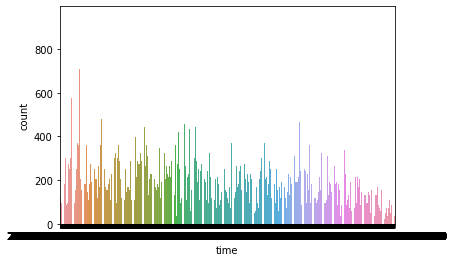

In [50]:
sns.countplot(x='time',data=train_quality_data)

In [51]:
train_quality_data['time'].value_counts().mean()

191.8555221115999

In [52]:
train_quality_data['time'].value_counts()[train_quality_data['time'].value_counts() > 800].index

Index(['2020-11-10 14:30:00', '2020-11-10 15:00:00', '2020-11-10 14:40:00',
       '2020-11-10 14:50:00', '2020-11-10 14:20:00', '2020-11-08 23:00:00',
       '2020-11-10 14:10:00'],
      dtype='object')

In [53]:
train_quality_data[train_quality_data['time'].isin(train_quality_data['time'].value_counts()[train_quality_data['time'].value_counts() > 800].index)]

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
1272,1272,2020-11-10 15:00:00,10039,04.16.3553,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1273,1273,2020-11-10 15:00:00,10039,04.16.3553,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1274,1274,2020-11-10 15:00:00,10039,04.16.3553,0.0,0,0.0,0,0,1,0,0,0,0,4,0,0
1275,1275,2020-11-10 15:00:00,10039,04.16.3553,0.0,0,0.0,0,0,3,0,0,0,0,4,0,0
1276,1276,2020-11-10 15:00:00,10039,04.16.3553,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828607,828607,2020-11-08 23:00:00,24997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,2,0,0
828608,828608,2020-11-08 23:00:00,24997,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,2,-1,0
828609,828609,2020-11-08 23:00:00,24997,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,2,-1,0
828610,828610,2020-11-08 23:00:00,24997,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,2,-1,0


In [54]:
train_quality_data[train_quality_data['time'] == 20201110143000]

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12


### 3_1_2 train_err data 결측치

>train_err data에는 errcode에 1개의 결측치가 있다.

In [55]:
train_err_data.isnull().sum()

Unnamed: 0    0
user_id       0
time          0
model_nm      0
fwver         0
errtype       0
errcode       1
dtype: int64

>결측데이터 row 확인

In [56]:
train_err_data[train_err_data['errcode'].isnull()]

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
3825744,3825744,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,NaN


In [57]:
train_err_data[(train_err_data['errtype'] == 5) & (train_err_data['user_id']==13639)]

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
3824876,3824876,13639,2020-11-14 09:51:11,model_2,04.33.1261,5,B-A8002
3824877,3824877,13639,2020-11-14 10:04:54,model_2,04.33.1261,5,B-A8002
3825262,3825262,13639,2020-11-16 19:32:36,model_2,04.33.1261,5,H-51042
3825299,3825299,13639,2020-11-16 19:58:07,model_2,04.33.1261,5,H-51042
3825711,3825711,13639,2020-11-21 00:43:11,model_2,04.33.1261,5,B-A8002
...,...,...,...,...,...,...,...
3825879,3825879,13639,2020-11-27 15:27:40,model_2,04.33.1261,5,B-A8002
3825880,3825880,13639,2020-11-27 15:28:05,model_2,04.33.1261,5,B-A8002
3825881,3825881,13639,2020-11-27 15:28:05,model_2,04.33.1261,5,B-A8002
3825882,3825882,13639,2020-11-27 16:12:36,model_2,04.33.1261,5,B-A8002


In [58]:
train_err_data.iloc[3825740:3825750,:]

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
3825740,3825740,13639,2020-11-21 15:47:31,model_2,04.33.1261,15,1
3825741,3825741,13639,2020-11-21 17:40:55,model_2,04.33.1261,16,1
3825742,3825742,13639,2020-11-21 17:40:58,model_2,04.33.1261,31,1
3825743,3825743,13639,2020-11-21 17:41:10,model_2,04.33.1261,31,0
3825744,3825744,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,NaN
3825745,3825745,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,40013
3825746,3825746,13639,2020-11-21 22:09:19,model_2,04.33.1261,15,1
3825747,3825747,13639,2020-11-22 03:06:33,model_2,04.33.1261,23,standby
3825748,3825748,13639,2020-11-22 03:06:39,model_2,04.33.1261,22,1
3825749,3825749,13639,2020-11-22 03:06:45,model_2,04.33.1261,42,3


> 같은 errtype 이고 에러가 연속해서 나타날 경우 같은 errcode를 보이는 경향이 있다.   
따라서 결측값은 같은 시간, 같은 errtype을 지닌 40013으로 채워넣는다.

In [59]:
train_err_data['errcode'].iloc[3825744] = 40013

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
train_err_data.iloc[3825740:3825750,:]

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
3825740,3825740,13639,2020-11-21 15:47:31,model_2,04.33.1261,15,1
3825741,3825741,13639,2020-11-21 17:40:55,model_2,04.33.1261,16,1
3825742,3825742,13639,2020-11-21 17:40:58,model_2,04.33.1261,31,1
3825743,3825743,13639,2020-11-21 17:41:10,model_2,04.33.1261,31,0
3825744,3825744,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,40013
3825745,3825745,13639,2020-11-21 19:17:18,model_2,04.33.1261,5,40013
3825746,3825746,13639,2020-11-21 22:09:19,model_2,04.33.1261,15,1
3825747,3825747,13639,2020-11-22 03:06:33,model_2,04.33.1261,23,standby
3825748,3825748,13639,2020-11-22 03:06:39,model_2,04.33.1261,22,1
3825749,3825749,13639,2020-11-22 03:06:45,model_2,04.33.1261,42,3


In [61]:
train_err_data.isnull().sum()

Unnamed: 0    0
user_id       0
time          0
model_nm      0
fwver         0
errtype       0
errcode       0
dtype: int64